<a href="https://colab.research.google.com/github/SharonOkolo/car-price/blob/main/Car-Price-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz

from sklearn.metrics import PredictionErrorDisplay
!pip install category_encoders -q

In [2]:
import sklearn
sklearn.set_config(transform_output="pandas")

In [113]:
url="https://raw.githubusercontent.com/SharonOkolo/CarPricePrediction/main/adverts%20(1).csv"
tc=pd.read_csv(url)

In [53]:
tc.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,2.020060e+14,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid


In [37]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  float64
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 34.1+ MB


In [7]:
tc.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [114]:
tc['reg_code'] = pd.to_numeric(tc['reg_code'], errors='coerce')

In [39]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  float64
 1   mileage                401878 non-null  float64
 2   reg_code               367233 non-null  float64
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 34.1+ MB


In [115]:
tc= tc.loc[ (tc['year_of_registration']>=1940.0) & (tc['year_of_registration']<=2023.0) ]

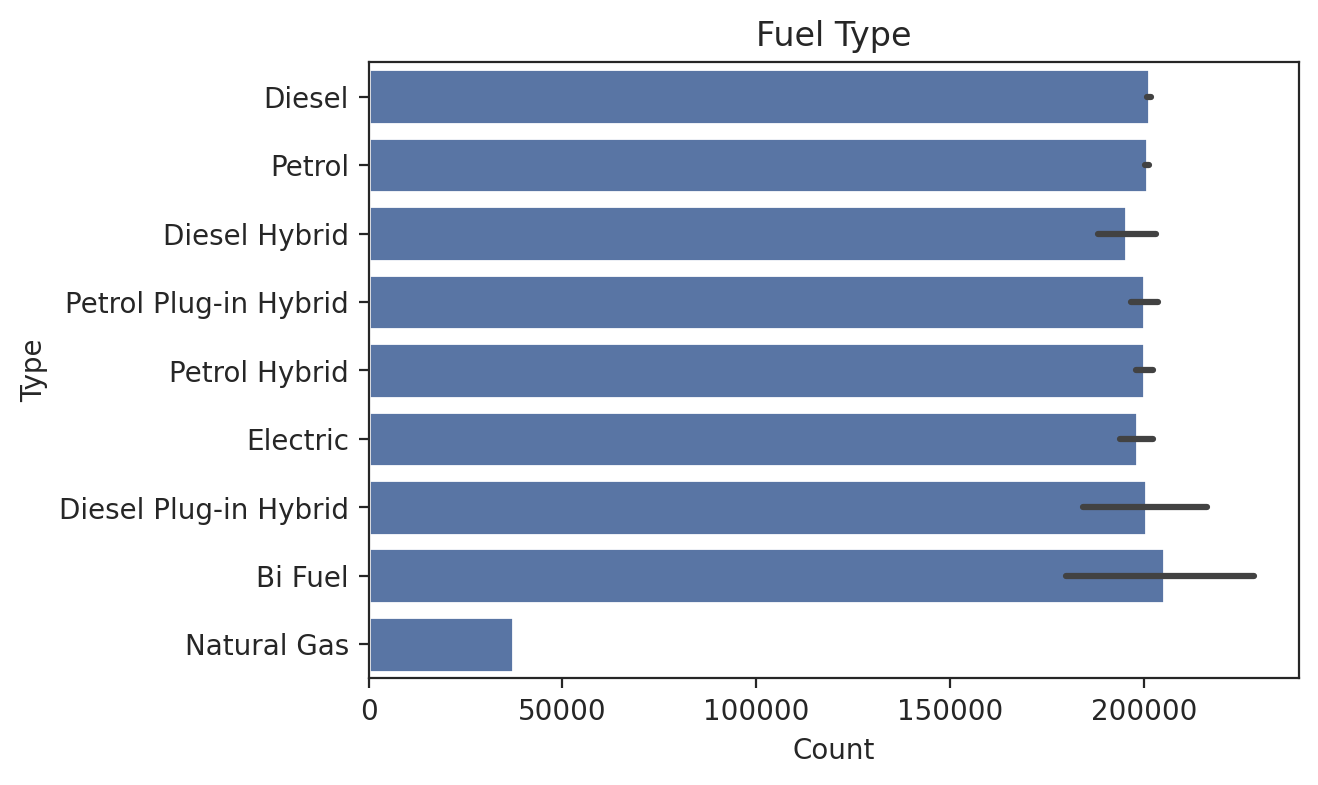

In [12]:
# Plotting the histogram using Seaborn
sns.barplot(tc['fuel_type'])

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Fuel Type')

# Show the plot
plt.show()


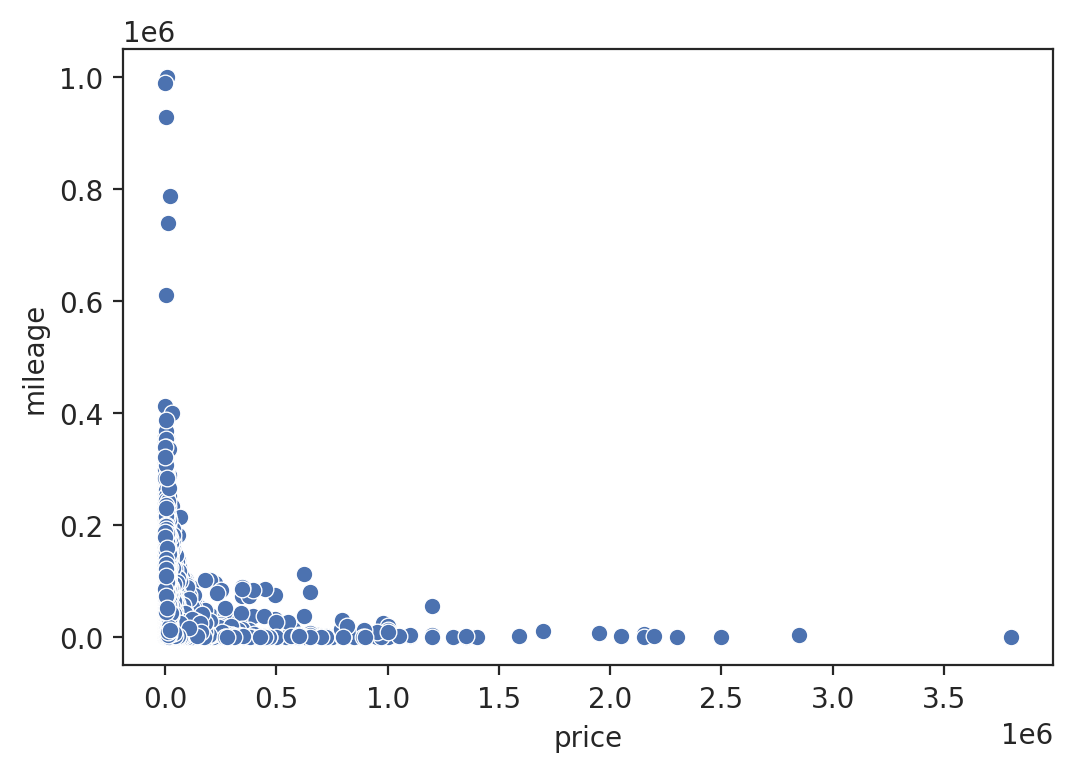

In [ ]:


# Example scatter plot
sns.scatterplot(x='price', y='mileage', data=tc)
plt.show()


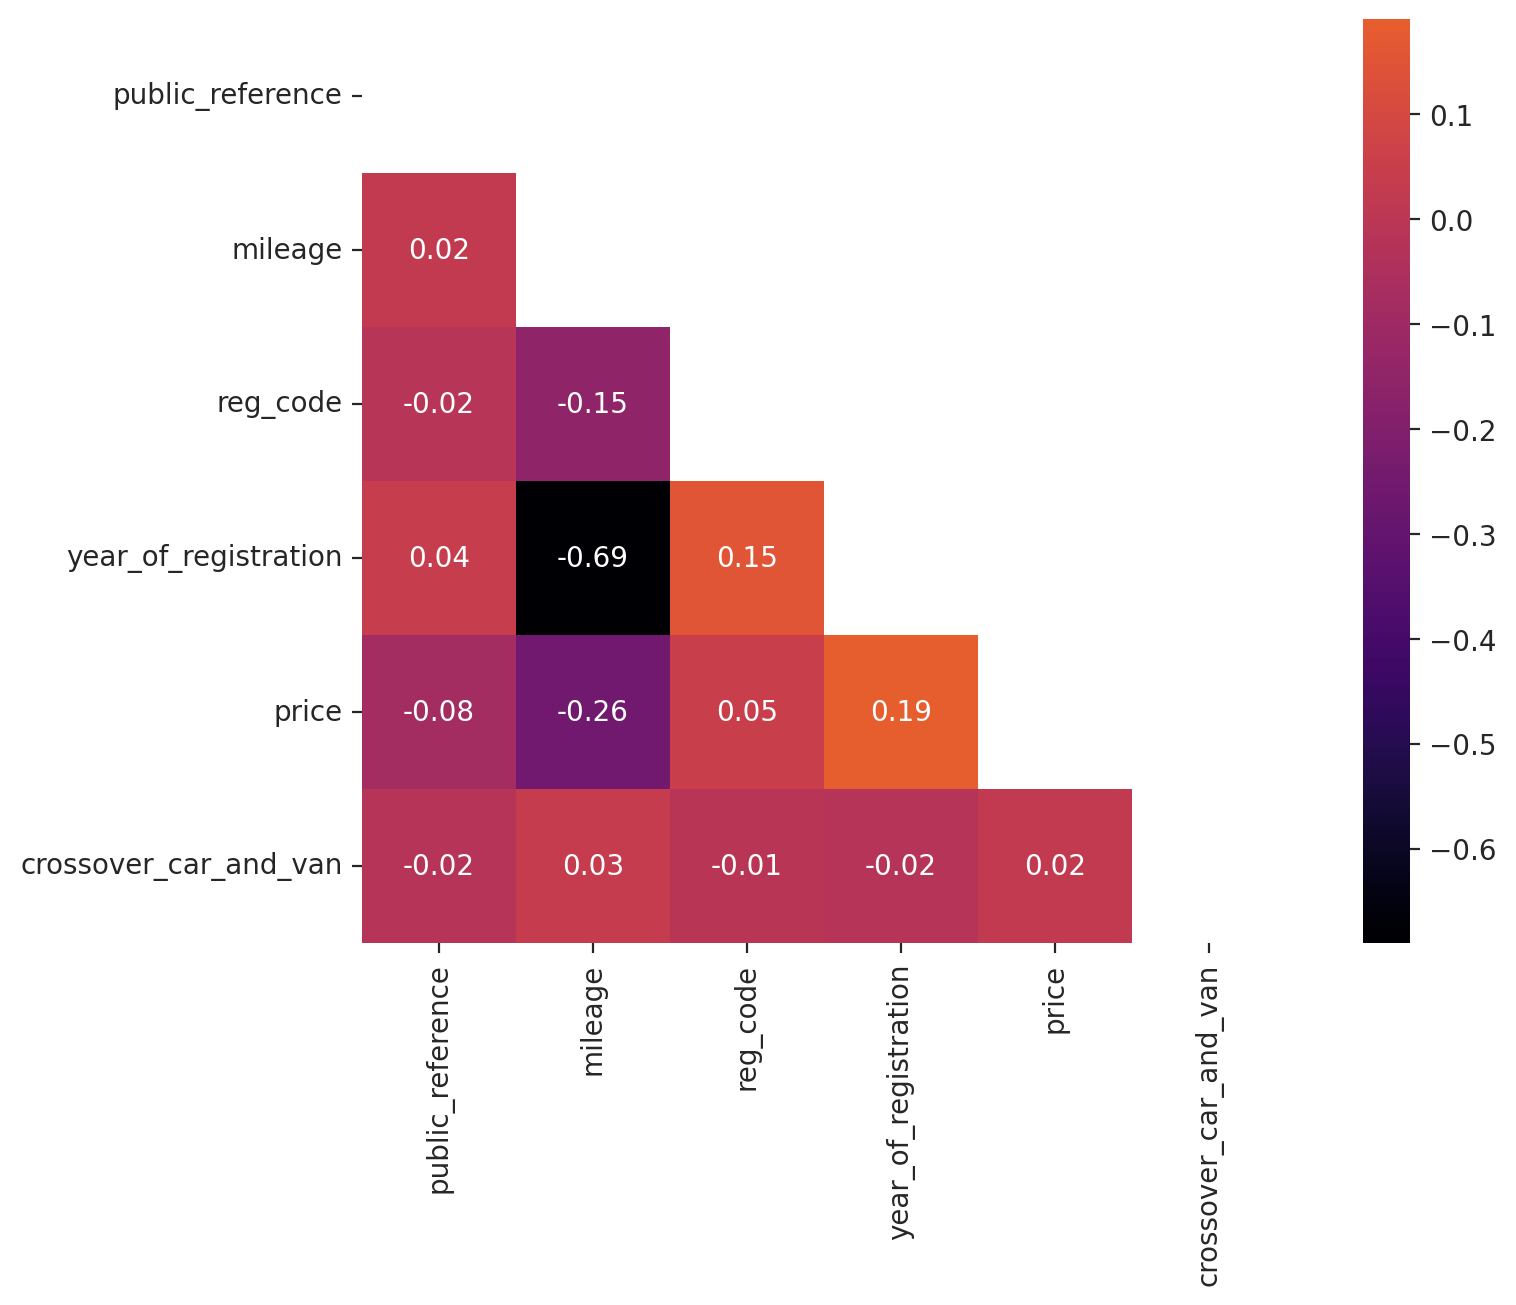

In [13]:
#df = sns.load_dataset('car_crashes')
corr =  tc.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
cmap = 'inferno'
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

In [116]:
le=LabelEncoder()

In [117]:
tc['standard_colour'] = le.fit_transform(tc['standard_colour'])

In [118]:
tc['standard_make'] = le.fit_transform(tc['standard_make'])

In [119]:
tc['standard_model'] = le.fit_transform(tc['standard_model'])

In [120]:
tc['vehicle_condition'] = le.fit_transform(tc['vehicle_condition'])

In [121]:
tc['body_type'] = le.fit_transform(tc['body_type'])

In [122]:
tc['crossover_car_and_van'] = le.fit_transform(tc['crossover_car_and_van'])

In [123]:
tc['fuel_type'] = le.fit_transform(tc['fuel_type'])

In [23]:
tc.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007000000000.0,108230.0,61.0,2,45,1081,0,2011.0,7000,14,0,1
2,202007000000000.0,7800.0,17.0,8,88,1099,0,2017.0,14000,13,0,6
3,202007000000000.0,45000.0,16.0,4,101,682,0,2016.0,7995,7,0,1
4,202007000000000.0,64000.0,64.0,8,52,809,0,2015.0,26995,13,0,1
5,202009000000000.0,16000.0,17.0,2,7,841,0,2017.0,29000,4,0,6


In [124]:
target = 'price'
cat_feat = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'crossover_car_and_van', 'year_of_registration', 'fuel_type']
num_feat = ['mileage','reg_code' ]

In [125]:
X= tc[cat_feat + num_feat]
y= tc[target]

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

**ANOVA** **Test**

In [109]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming df is your DataFrame with relevant columns, including 'Price' and 'Category'
# Example: df = pd.read_csv('your_dataset.csv')

# Fit ANOVA model
model = ols('price ~ standard_make', data=tc).fit()

# Print ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Perform Tukey's HSD post-hoc test
tukey_results = pairwise_tukeyhsd(tc['price'], tc['standard_make'])
print(tukey_results.summary().data[:5])


                     sum_sq        df            F  PR(>F)
standard_make  2.406064e+12       1.0  3915.855906     0.0
Residual       2.265268e+14  368671.0          NaN     NaN
[['group1', 'group2', 'meandiff', 'p-adj', 'lower', 'upper', 'reject'], [0, 1, -32639.9395, 1.0, -115838.7137, 50558.8347, False], [0, 2, -40847.5, 1.0, -142679.2643, 60984.2643, False], [0, 3, -30575.9953, 1.0, -113753.7296, 52601.739, False], [0, 4, 6879.5294, 1.0, -78676.2655, 92435.3243, False]]


**Correlation Analysis**

In [110]:

# Additional analysis for numerical features (e.g., mileage, year_of_registration)
# Example correlation analysis
correlation_mileage = tc['price'].corr(tc['mileage'])
print(f"\nCorrelation between price and mileage: {correlation_mileage:.4f}")

correlation_year = tc['price'].corr(tc['year_of_registration'])
print(f"Correlation between price and year_of_registration: {correlation_year:.4f}")

correlation_year = tc['price'].corr(tc['standard_make'])
print(f"Correlation between price and standard_make: {correlation_year:.4f}")

correlation_year = tc['price'].corr(tc['crossover_car_and_van'])
print(f"Correlation between price and crossover_car_and_van: {correlation_year:.4f}")

correlation_year = tc['price'].corr(tc['body_type'])
print(f"Correlation between price and body_type: {correlation_year:.4f}")

correlation_year = tc['price'].corr(tc['fuel_type'])
print(f"Correlation between price and fuel_type: {correlation_year:.4f}")


Correlation between price and mileage: -0.2593
Correlation between price and year_of_registration: 0.1850
Correlation between price and standard_make: -0.1025
Correlation between price and crossover_car_and_van: 0.0220
Correlation between price and body_type: 0.0653
Correlation between price and fuel_type: 0.0189


In [127]:
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

In [29]:
tc.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007000000000.0,108230.0,61.0,2,45,1081,0,2011.0,7000,14,0,1


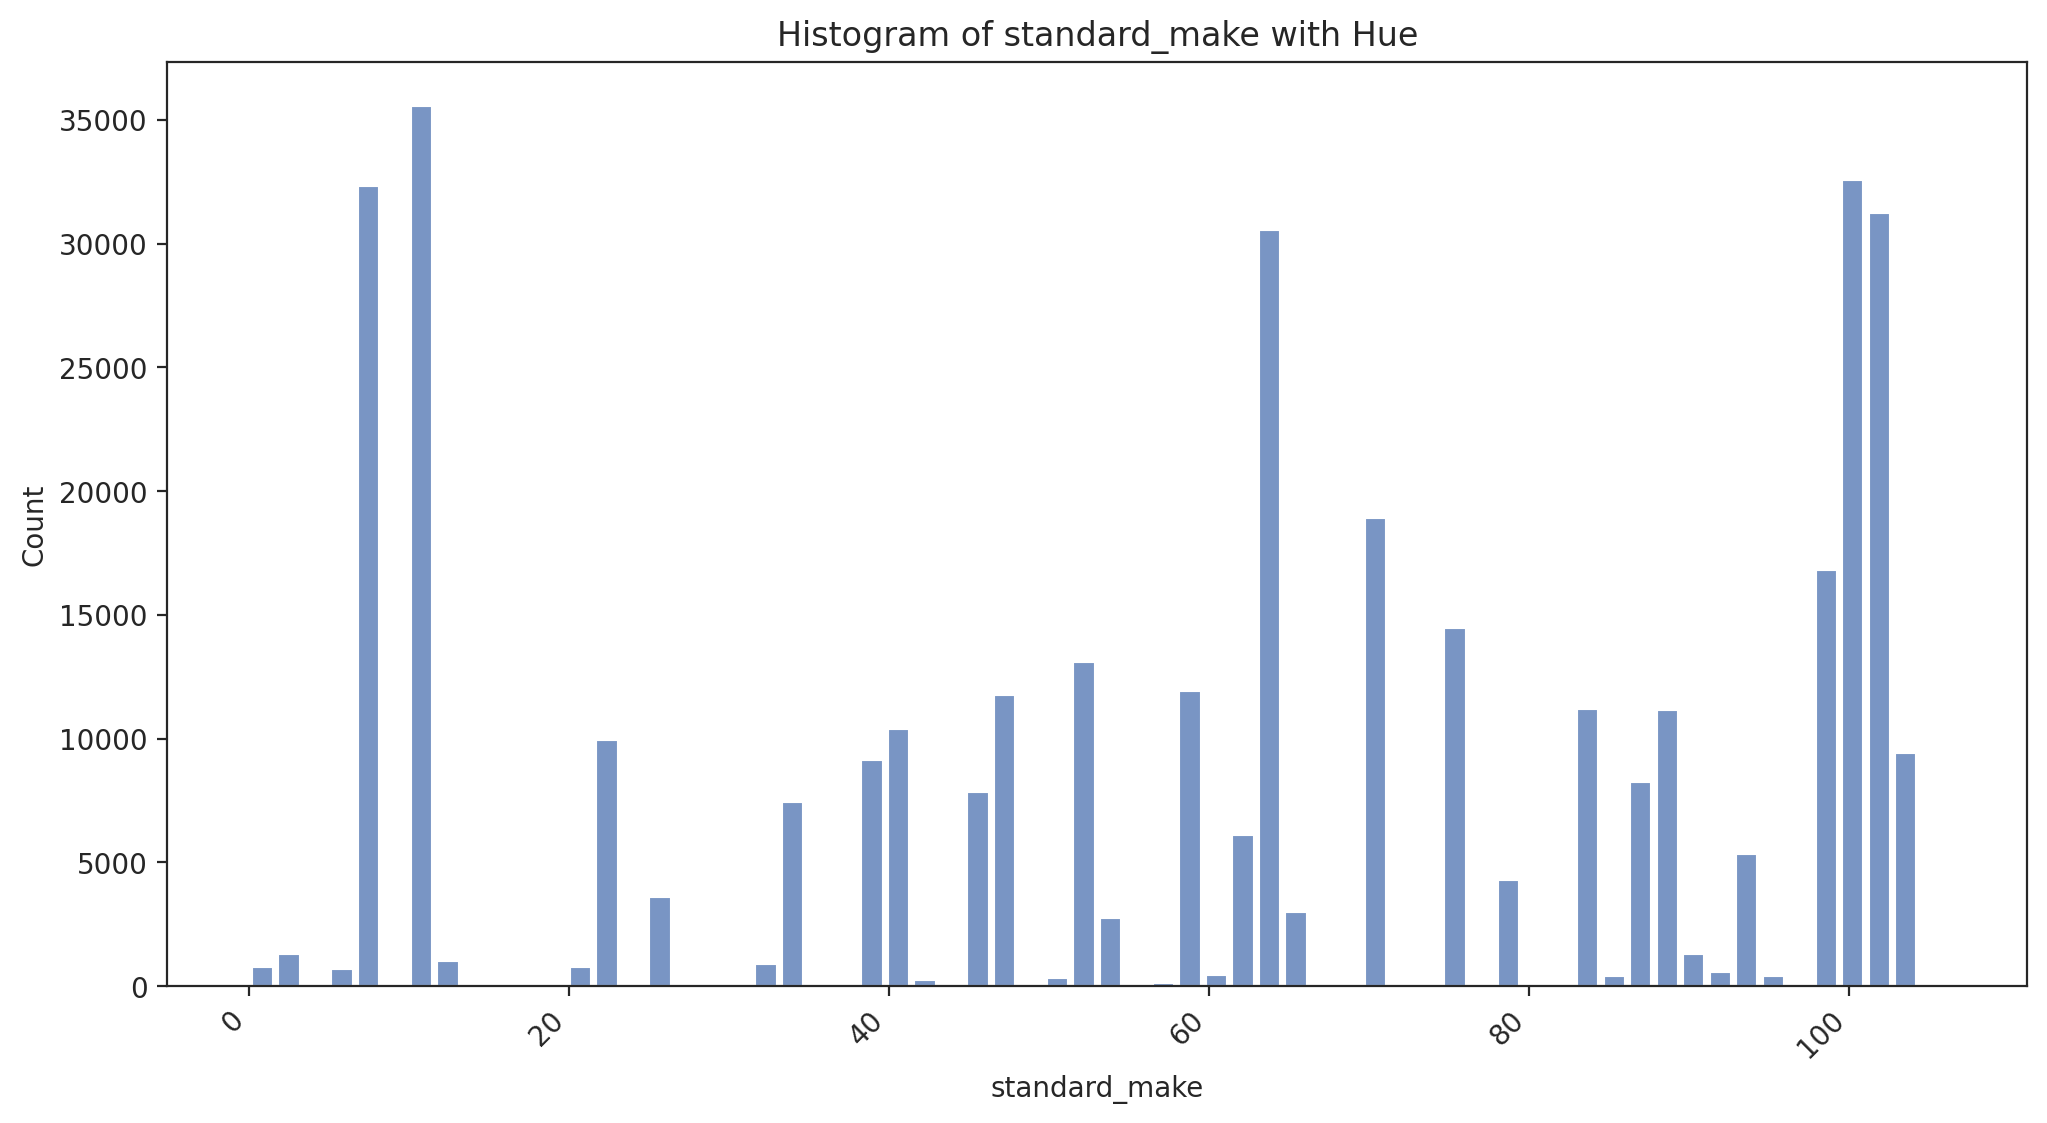

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the specified features
# Example dataset creation (replace this with your actual dataset loading)
# df = pd.read_csv('your_dataset.csv')

# Create a histogram with hue
plt.figure(figsize=(12, 6))
sns.histplot(data=X, x='standard_make',  shrink=0.8)
plt.title('Histogram of standard_make')
plt.xlabel('standard_make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


<Axes: xlabel='standard_colour', ylabel='standard_make'>

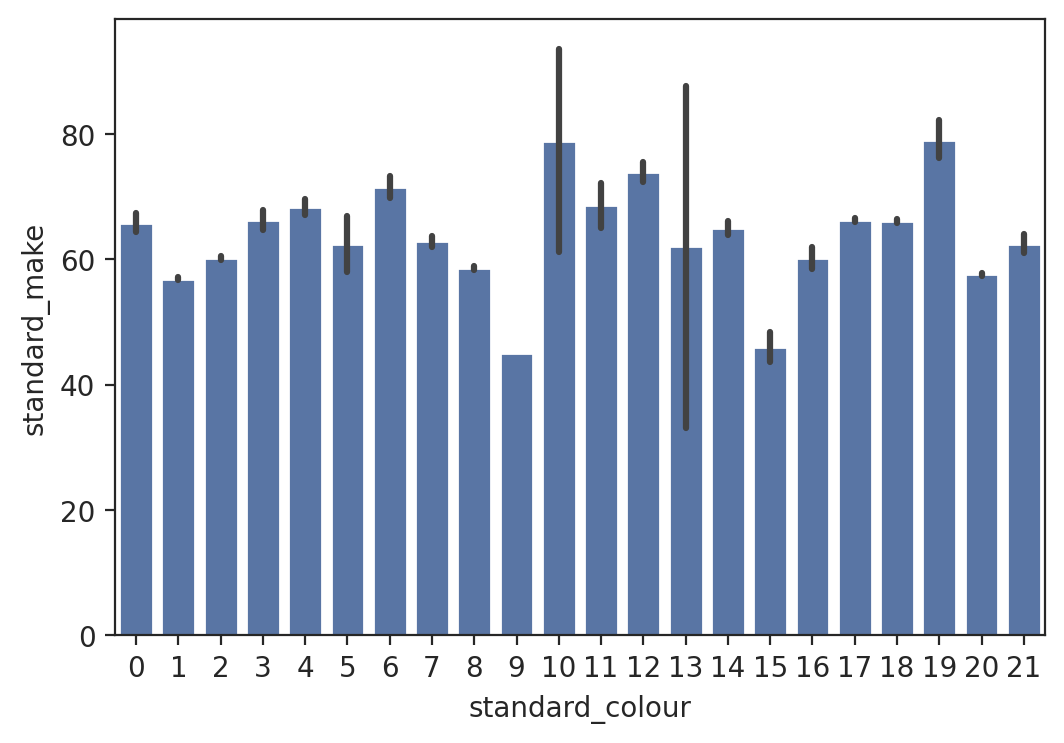

In [ ]:
sns.barplot(x='standard_colour', y='standard_make', data=X)

<Axes: xlabel='body_type', ylabel='standard_make'>

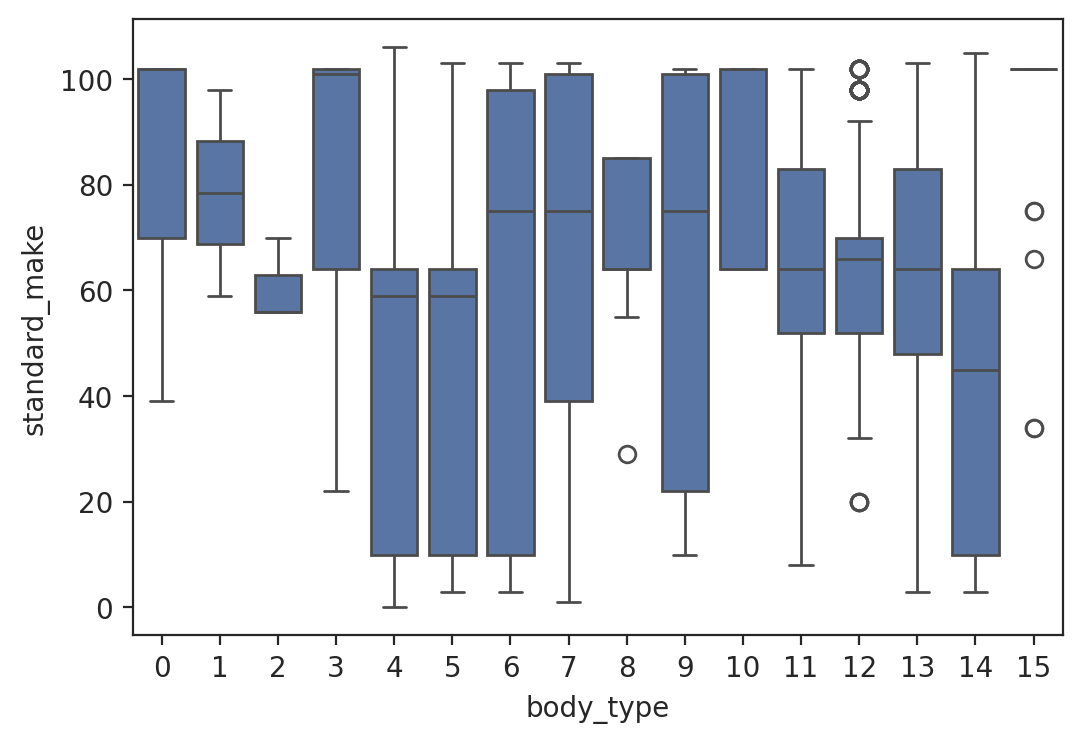

In [ ]:
sns.boxplot(x='body_type', y='standard_make', data=X)

**Permutation Importance**

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Define three different models (you can replace them with your own models)
model_knn = KNeighborsRegressor()
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
# Fit the models
model_knn.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_lr.fit(X_train, y_train)


# Evaluate the models on the test set
y_pred_knn = model_knn.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_lr = model_lr.predict(X_test)


# Calculate mean squared error for each model
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_lr = mean_squared_error(y_test, y_pred_lr)


# Print the mean squared errors
print(f'MSE K-Nearest Neighbour: {mse_knn}')
print(f'MSE Decision Tree: {mse_dt}')
print(f'MSE Linear Regression: {mse_lr}')



result_knn = permutation_importance(model_knn, X_test, y_test, n_repeats=30, random_state=42)
# Display the permutation importance results for each feature
print('\nPermutation Importance - K-Nearest Neighbour:')
print(pd.DataFrame({'Feature': X.columns, 'Importance': result_knn.importances_mean}))

result_dt = permutation_importance(model_dt, X_test, y_test, n_repeats=30, random_state=42)

# Display the permutation importance results for each feature
print('\nPermutation Importance - Decision Tree:')
print(pd.DataFrame({'Feature': X.columns, 'Importance': result_dt.importances_mean}))

result_lr = permutation_importance(model_lr, X_test, y_test, n_repeats=30, random_state=42)


# Display the permutation importance results for each feature
print('\nPermutation Importance - Linear Regression:')
print(pd.DataFrame({'Feature': X.columns, 'Importance': result_lr.importances_mean}))

MSE K-Nearest Neighbour: 509685851.8251674
MSE Decision Tree: 244947467.70004636
MSE Linear Regression: 513373917.7089796

Permutation Importance - K-Nearest Neighbour:
                 Feature    Importance
0        standard_colour  1.131051e-02
1          standard_make  1.778651e-01
2         standard_model  2.387850e-01
3      vehicle_condition  0.000000e+00
4              body_type  1.131863e-03
5  crossover_car_and_van -2.019142e-07
6   year_of_registration  5.295267e-03
7              fuel_type  6.975989e-04
8                mileage  3.028542e-01
9               reg_code  1.824729e-02


**KNN**

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer



scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regression model
knn_model = KNeighborsRegressor()

# Define the hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # adjust as needed
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print information for each combination of hyperparameters
for params, mean_score, scores in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['std_test_score']):
    mae = np.sqrt(-mean_score)
    mse = mean_score
    r2 = r2_score(y_test, grid_search.best_estimator_.predict(X_test))

    print(f"Number of Neighbors: {params['n_neighbors']}, Mean Test Score: {mean_score:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, R-squared: {r2:.4f}")

# Get the best model from the grid search
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
X_test_scaled = scaler.transform(X_test)  # Scale the test set using the same scaler
y_pred = best_knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("R-squared:", r2_knn)

# Cross-validation scores
cv_scores_knn = cross_val_score(best_knn_model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse_scores_knn = np.sqrt(-cv_scores_knn)  # Convert negative MSE to RMSE

print("\nCross-Validation RMSE Scores:")
print(cv_rmse_scores_knn)

# Optionally, you can print other information about the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

Number of Neighbors: 3, Mean Test Score: -345178847.4668, MAE: 18578.9894, MSE: -345178847.4668, R-squared: 0.4534
Number of Neighbors: 5, Mean Test Score: -354022591.9508, MAE: 18815.4881, MSE: -354022591.9508, R-squared: 0.4534
Number of Neighbors: 7, Mean Test Score: -359722838.6898, MAE: 18966.3607, MSE: -359722838.6898, R-squared: 0.4534
Number of Neighbors: 9, Mean Test Score: -367658128.4450, MAE: 19174.4134, MSE: -367658128.4450, R-squared: 0.4534
Mean Squared Error (MSE): 332252484.4239009
Mean Absolute Error (MAE): 2780.7035329219507
R-squared: 0.45341508231359273

Cross-Validation RMSE Scores:
[18654.11121354 14082.09831463 22636.95832267 17474.13212019
 16813.68882623]

Best Hyperparameters:
{'n_neighbors': 3}


**Decision tree**

In [171]:


# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor()

# Define the hyperparameters to search over
param_grid = {
    'max_depth': [ 5, 10, 15],  # adjust as needed
    'min_samples_split': [2, 5, 10],  # adjust as needed
}



# Use GridSearchCV for hyperparameter tuning
dt_grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Print information for each combination of hyperparameters
for params, mean_score, scores in zip(dt_grid_search.cv_results_['params'], dt_grid_search.cv_results_['mean_test_score'], dt_grid_search.cv_results_['std_test_score']):
    mae_dt = np.sqrt(-mean_score)
    mse_dt = mean_score
    r2_dt = r2_score(y_test, best_dt_model.predict(X_test))

    print(f"Max Depth: {params['max_depth']}, Min Samples Split: {params['min_samples_split']}, Mean Test Score: {mean_score:.4f}, MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, R-squared: {r2_dt:.4f}")

# Get the best model from the grid search
best_dt_model = dt_grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred)
mae_dt = mean_absolute_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

print("\nBest Hyperparameters:")
print(dt_grid_search.best_params_)
print("Mean Squared Error (MSE):", mse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("R-squared:", r2_dt)

# Cross-validation scores
cv_scores_dt = cross_val_score(best_dt_model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse_scores_dt = np.sqrt(-cv_scores_dt)  # Convert negative MSE to RMSE

print("\nCross-Validation RMSE Scores:")
print(cv_rmse_scores_dt)


Max Depth: 5, Min Samples Split: 2, Mean Test Score: -479193605.4919, MAE: 21890.4912, MSE: -479193605.4919, R-squared: 0.4650
Max Depth: 5, Min Samples Split: 5, Mean Test Score: -481413365.5822, MAE: 21941.1341, MSE: -481413365.5822, R-squared: 0.4650
Max Depth: 5, Min Samples Split: 10, Mean Test Score: -482804591.8852, MAE: 21972.8148, MSE: -482804591.8852, R-squared: 0.4650
Max Depth: 10, Min Samples Split: 2, Mean Test Score: -614543678.0501, MAE: 24789.9915, MSE: -614543678.0501, R-squared: 0.4650
Max Depth: 10, Min Samples Split: 5, Mean Test Score: -447731282.6556, MAE: 21159.6617, MSE: -447731282.6556, R-squared: 0.4650
Max Depth: 10, Min Samples Split: 10, Mean Test Score: -389733142.7275, MAE: 19741.6601, MSE: -389733142.7275, R-squared: 0.4650
Max Depth: 15, Min Samples Split: 2, Mean Test Score: -436234184.4243, MAE: 20886.2200, MSE: -436234184.4243, R-squared: 0.4650
Max Depth: 15, Min Samples Split: 5, Mean Test Score: -404682834.6520, MAE: 20116.7302, MSE: -404682834.6

In [137]:
clf = GridSearchCV(dt_model, param_grid, return_train_score=True)
gs_results = clf.fit(X_train, y_train)

In [176]:
gs_df = pd.DataFrame(gs_results.cv_results_)
gs_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [177]:
gs_df[ [
    'param_max_depth', 'param_min_samples_split',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
] ].sort_values('rank_test_score')

,param_max_depth,param_min_samples_split,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
8,15,10,0.776284,0.015822,0.451874,0.144350,1
5,10,10,0.646365,0.019962,0.355665,0.159400,2
7,15,5,0.893705,0.024815,0.333088,0.195706,3
3,10,2,0.785577,0.015072,0.307113,0.122231,4
4,10,5,0.739632,0.030787,0.256906,0.206538,5
6,15,2,0.963985,0.004725,0.252177,0.359141,6
1,5,5,0.387427,0.023219,0.216258,0.140538,7
2,5,10,0.385941,0.022478,0.213429,0.140312,8
0,5,2,0.392341,0.020013,0.197904,0.169724,9


In [ ]:
print(export_text(best_dt_model, feature_names=X.columns.to_list()))

|--- mileage <= 11005.50
|   |--- body_type <= 5.50
|   |   |--- year_of_registration <= 2015.50
|   |   |   |--- fuel_type <= 6.50
|   |   |   |   |--- mileage <= 2226.50
|   |   |   |   |   |--- standard_make <= 39.00
|   |   |   |   |   |   |--- standard_model <= 535.50
|   |   |   |   |   |   |   |--- value: [264808.89]
|   |   |   |   |   |   |--- standard_model >  535.50
|   |   |   |   |   |   |   |--- value: [1235824.17]
|   |   |   |   |   |--- standard_make >  39.00
|   |   |   |   |   |   |--- standard_model <= 209.00
|   |   |   |   |   |   |   |--- mileage <= 155.50
|   |   |   |   |   |   |   |   |--- value: [752498.75]
|   |   |   |   |   |   |   |--- mileage >  155.50
|   |   |   |   |   |   |   |   |--- value: [138612.50]
|   |   |   |   |   |   |--- standard_model >  209.00
|   |   |   |   |   |   |   |--- standard_model <= 443.00
|   |   |   |   |   |   |   |   |--- value: [182781.00]
|   |   |   |   |   |   |   |--- standard_model >  443.00
|   |   |   |   |   |   |

In [ ]:
viz_rmodel = dtreeviz.model(best_dt_model, X_train, y_train,
                            feature_names=X.columns.tolist(),
                            target_name='price')

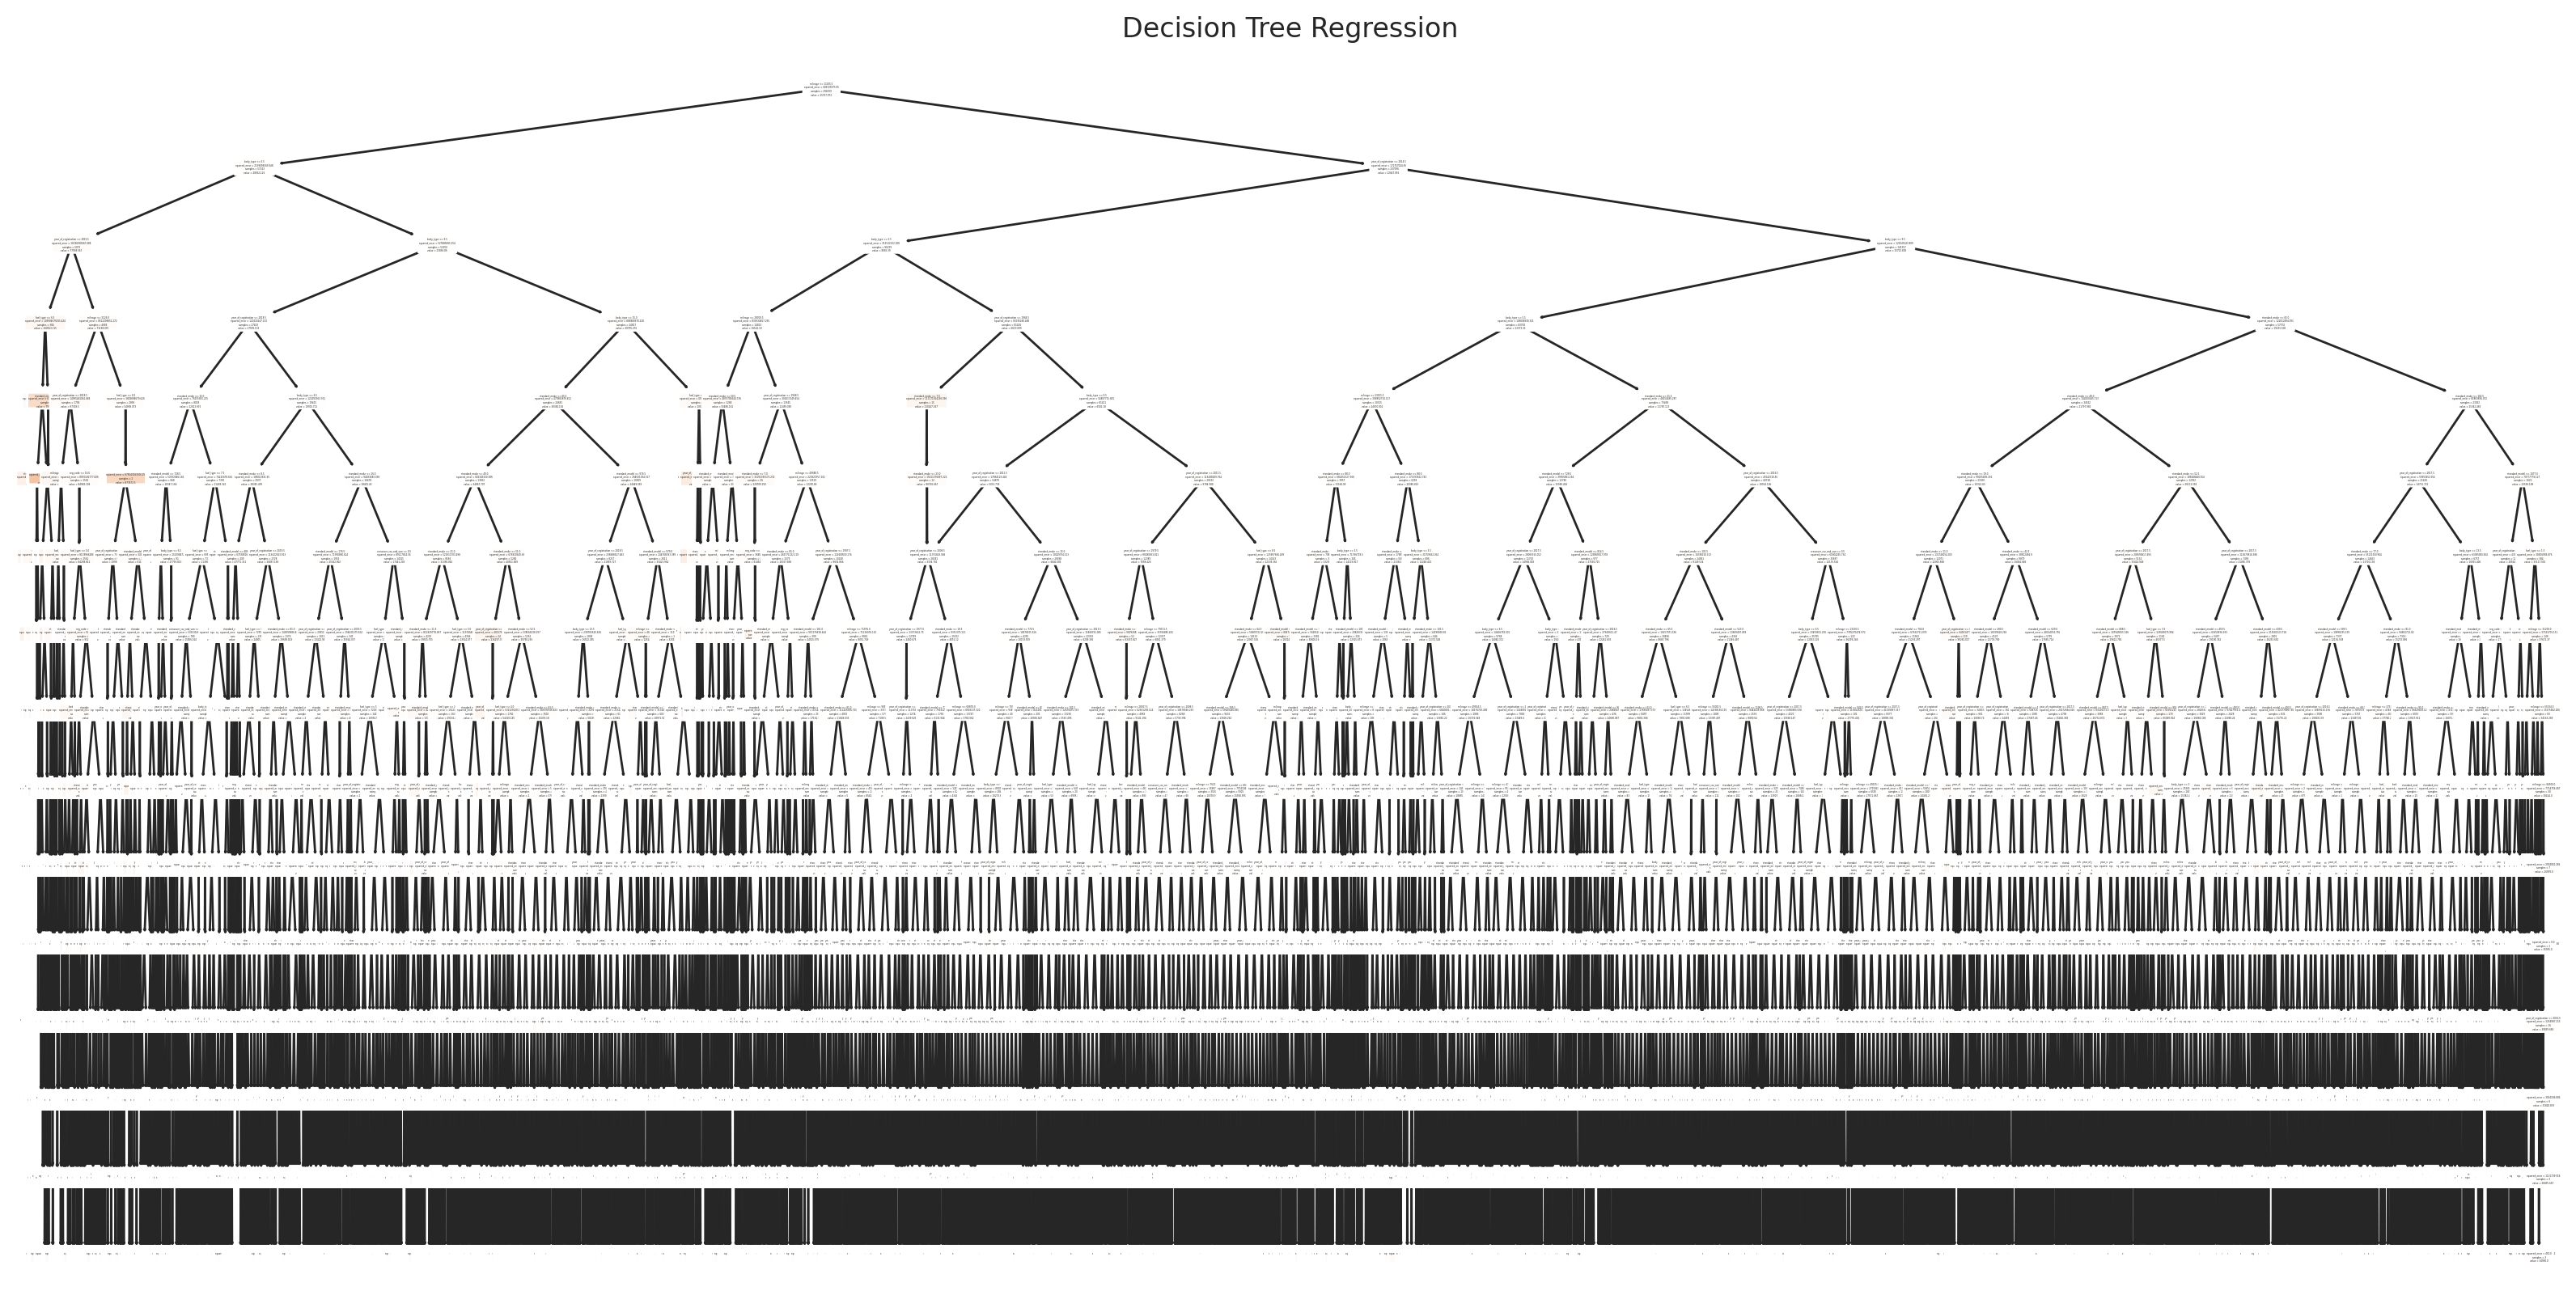

In [ ]:
#from sklearn.tree import DecisionTreeRegressor, plot_tree
#import matplotlib.pyplot as plt

# Fit the model on the training data
#best_dt_model.fit(X_train, y_train)

# Visualize the Decision Tree using plot_tree
#plt.figure(figsize=(20, 10))
#plot_tree(best_dt_model, feature_names=list(X.columns), filled=True, rounded=True)
#plt.title("Decision Tree Regression")
#plt.show()


**Linear Regression**

In [172]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the polynomial features
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse_lr}')
print("Mean Absolute Error (MAE):", mae_lr)
print("R-squared:", r2_lr)

# Cross-validation scores
cv_scores_lr = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse_scores_lr = np.sqrt(-cv_scores_lr)  # Convert negative MSE to RMSE

print("\nCross-Validation RMSE Scores:")
print(cv_rmse_scores_lr)



Mean Squared Error: 508493217.01165843
Mean Absolute Error (MAE): 7443.621490717314
R-squared: 0.16348338629783254

Cross-Validation RMSE Scores:
[23841.63586479 21063.31231336 27592.81102131 22763.09842601
 23440.024312  ]


In [173]:
print("\nCross-Validation KNN RMSE Scores:")
print(cv_rmse_scores_knn)

print("\nCross-Validation Decision Tree RMSE Scores:")
print(cv_rmse_scores_dt)

print("\nCross-Validation Linear Regression RMSE Scores:")
print(cv_rmse_scores_lr)


Cross-Validation KNN RMSE Scores:
[18654.11121354 14082.09831463 22636.95832267 17474.13212019
 16813.68882623]

Cross-Validation Decision Tree RMSE Scores:
[21006.09934405 15606.04967491 24269.57417353 15725.3193563
 21134.59631115]

Cross-Validation Linear Regression RMSE Scores:
[23841.63586479 21063.31231336 27592.81102131 22763.09842601
 23440.024312  ]


**Visualisation of the Cross Validation Score of each fold**

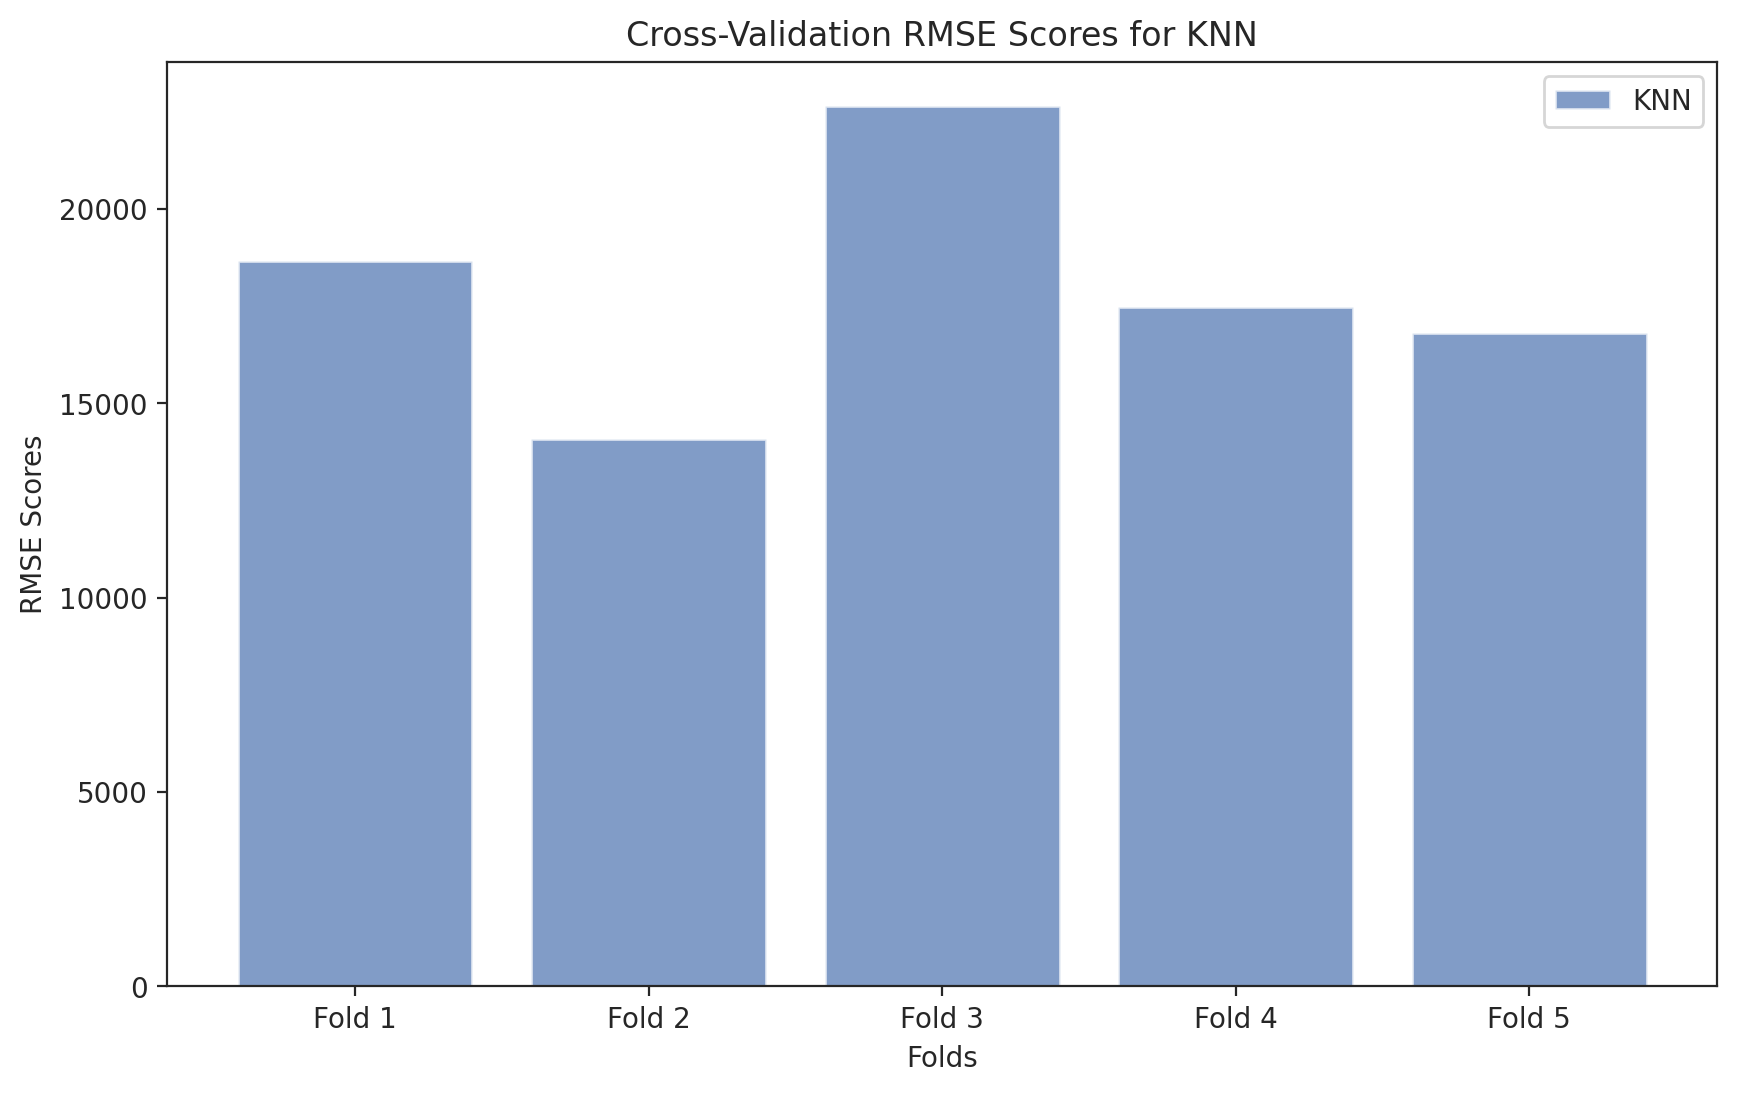

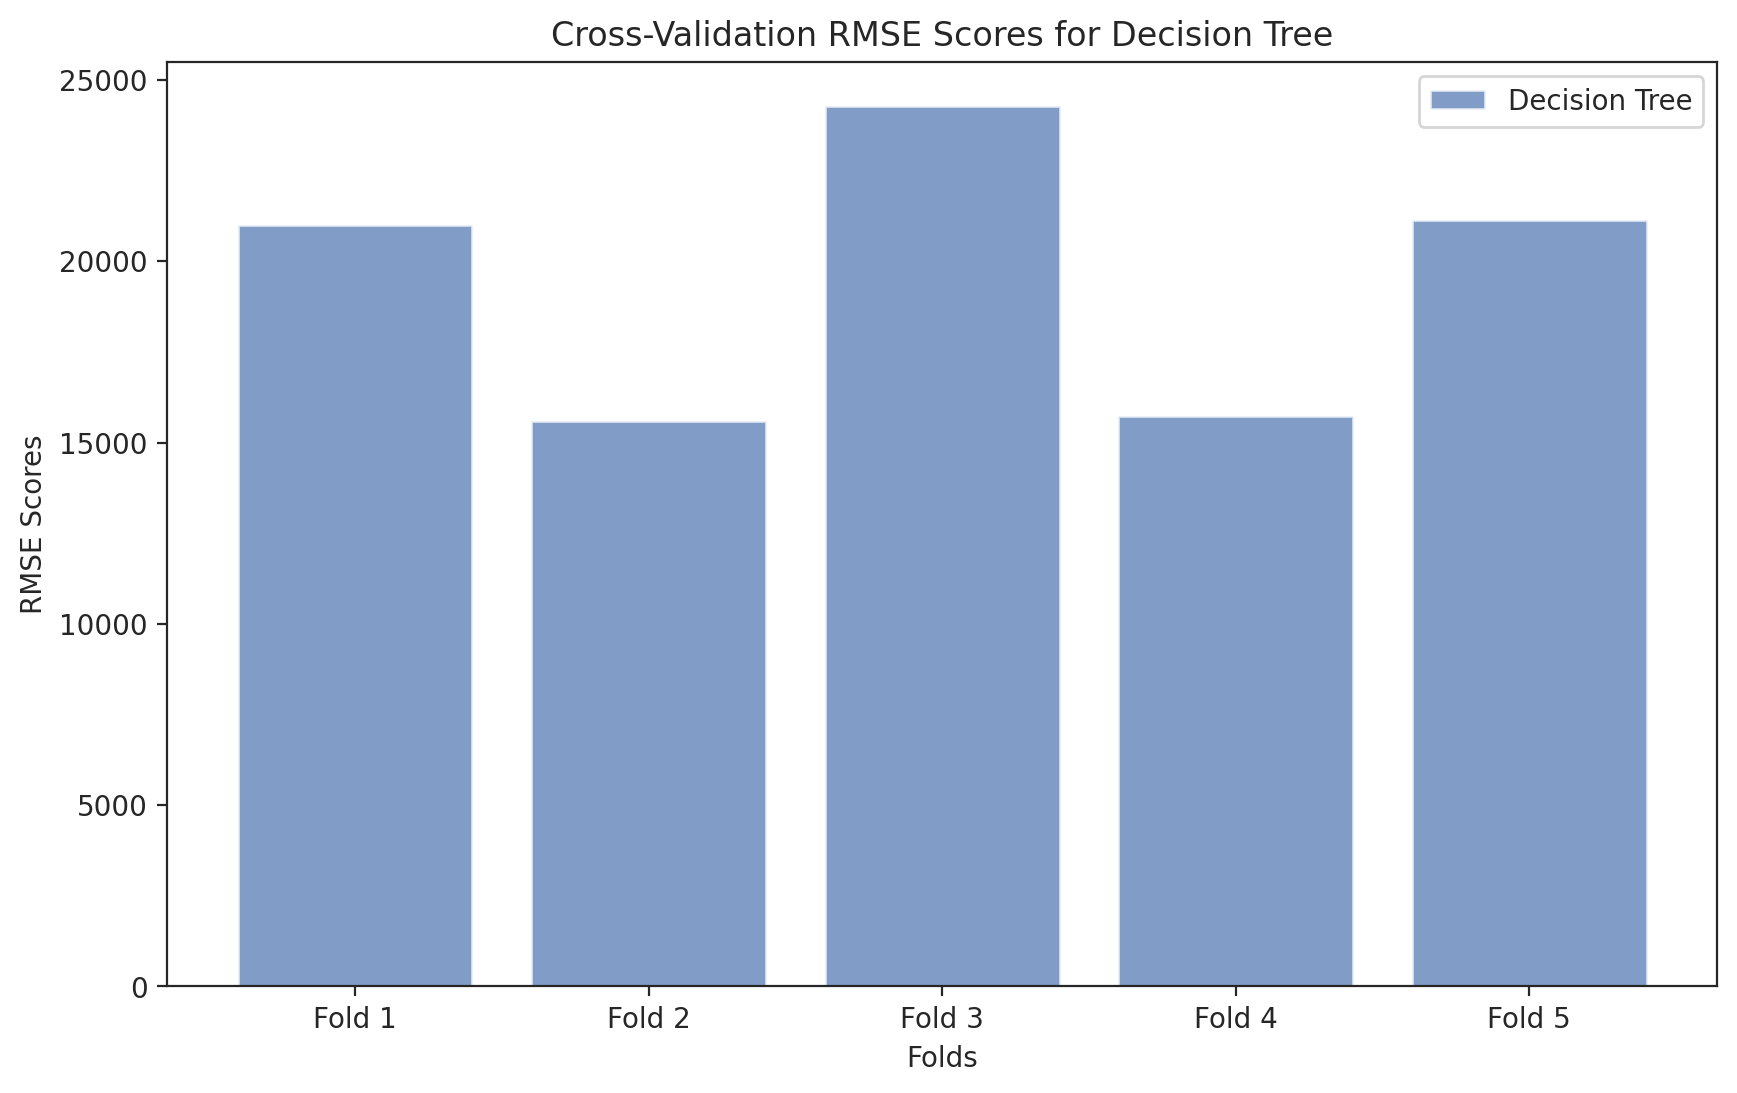

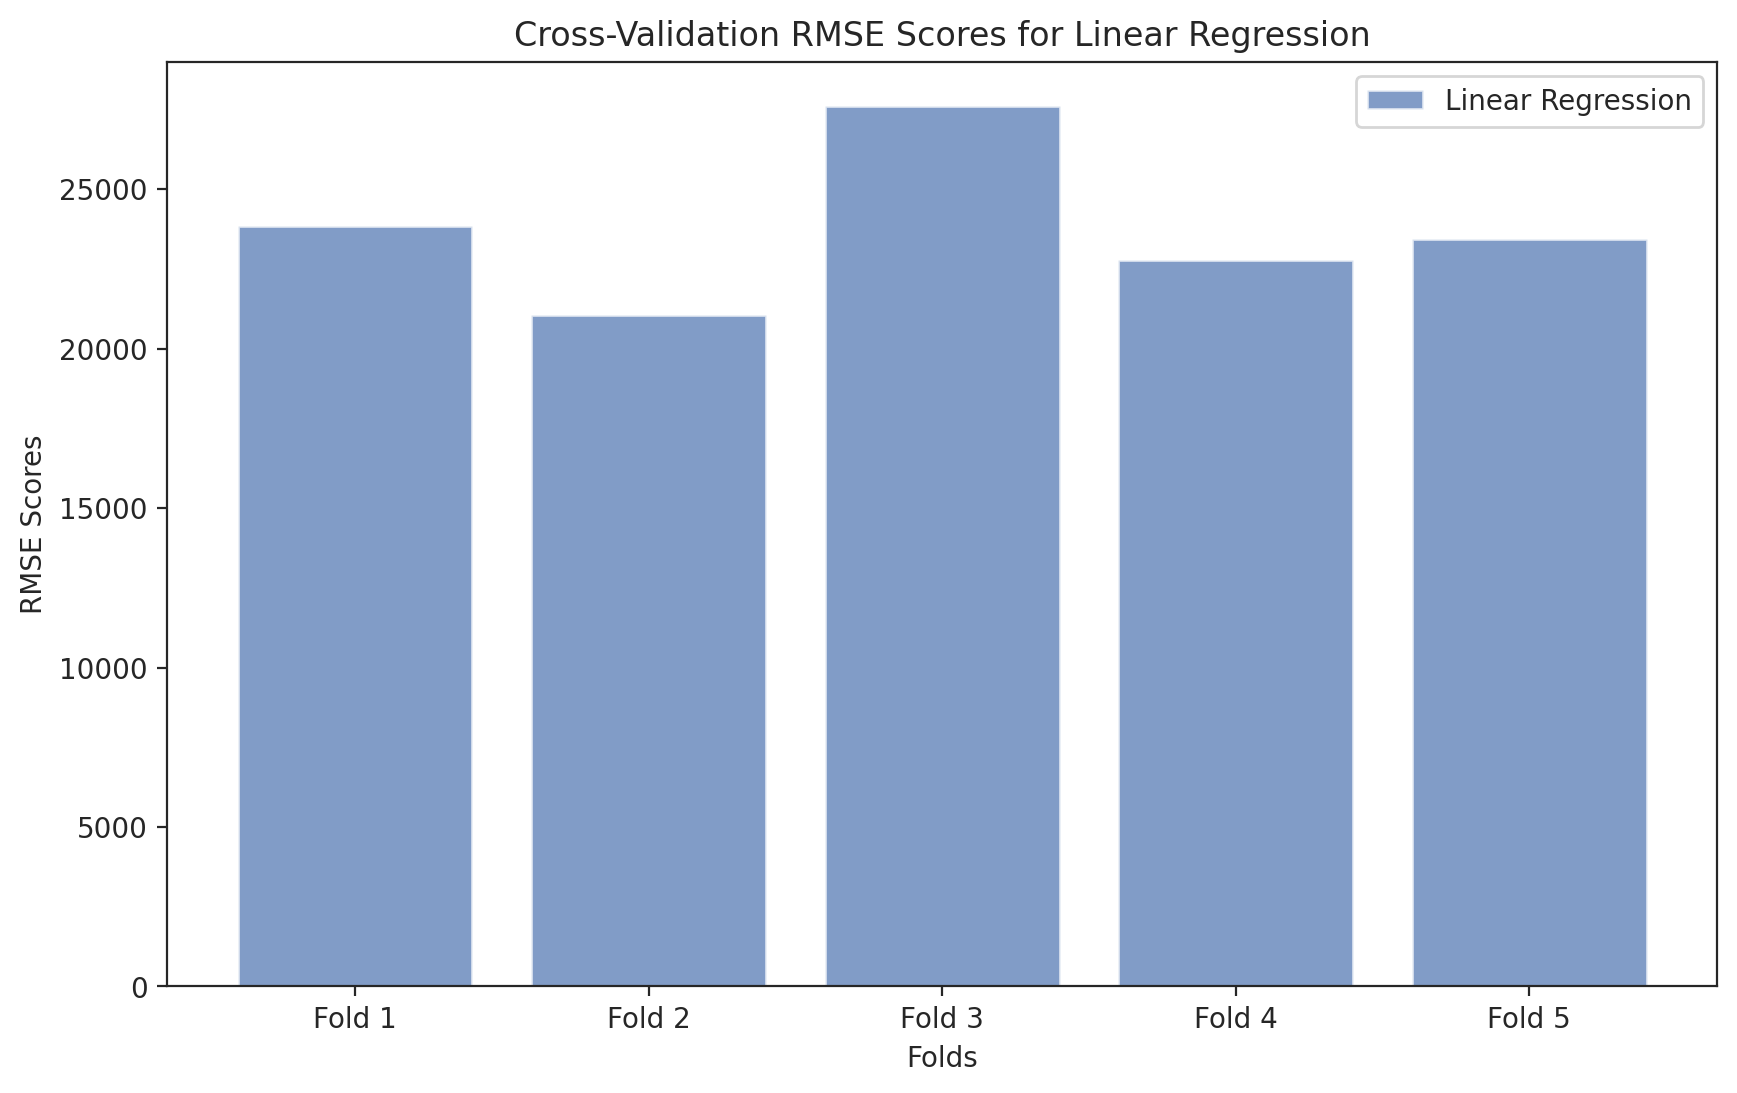

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
knn_rmse_scores = np.array(cv_rmse_scores_knn)
dt_rmse_scores = np.array(cv_rmse_scores_dt)
lr_rmse_scores = np.array(cv_rmse_scores_lr)

#models = ['KNN', 'Decision Tree', 'Linear Regression']

models = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

# Plot Cross-Validation RMSE Scores for KNN
plt.figure(figsize=(10, 6))
plt.bar(models, knn_rmse_scores, label='KNN', alpha=0.7)
plt.title('Cross-Validation RMSE Scores for KNN')
plt.xlabel('Folds')
plt.ylabel('RMSE Scores')
plt.legend()
plt.show()

# Plot Cross-Validation RMSE Scores for Decision Tree
plt.figure(figsize=(10, 6))
plt.bar(models, dt_rmse_scores, label='Decision Tree', alpha=0.7)
plt.title('Cross-Validation RMSE Scores for Decision Tree')
plt.xlabel('Folds')
plt.ylabel('RMSE Scores')
plt.legend()
plt.show()

# Plot Cross-Validation RMSE Scores for Linear Regression
plt.figure(figsize=(10, 6))
plt.bar(models, lr_rmse_scores, label='Linear Regression', alpha=0.7)
plt.title('Cross-Validation RMSE Scores for Linear Regression')
plt.xlabel('Folds')
plt.ylabel('RMSE Scores')
plt.legend()
plt.show()


**Visualisation of the average cross validation of each model**

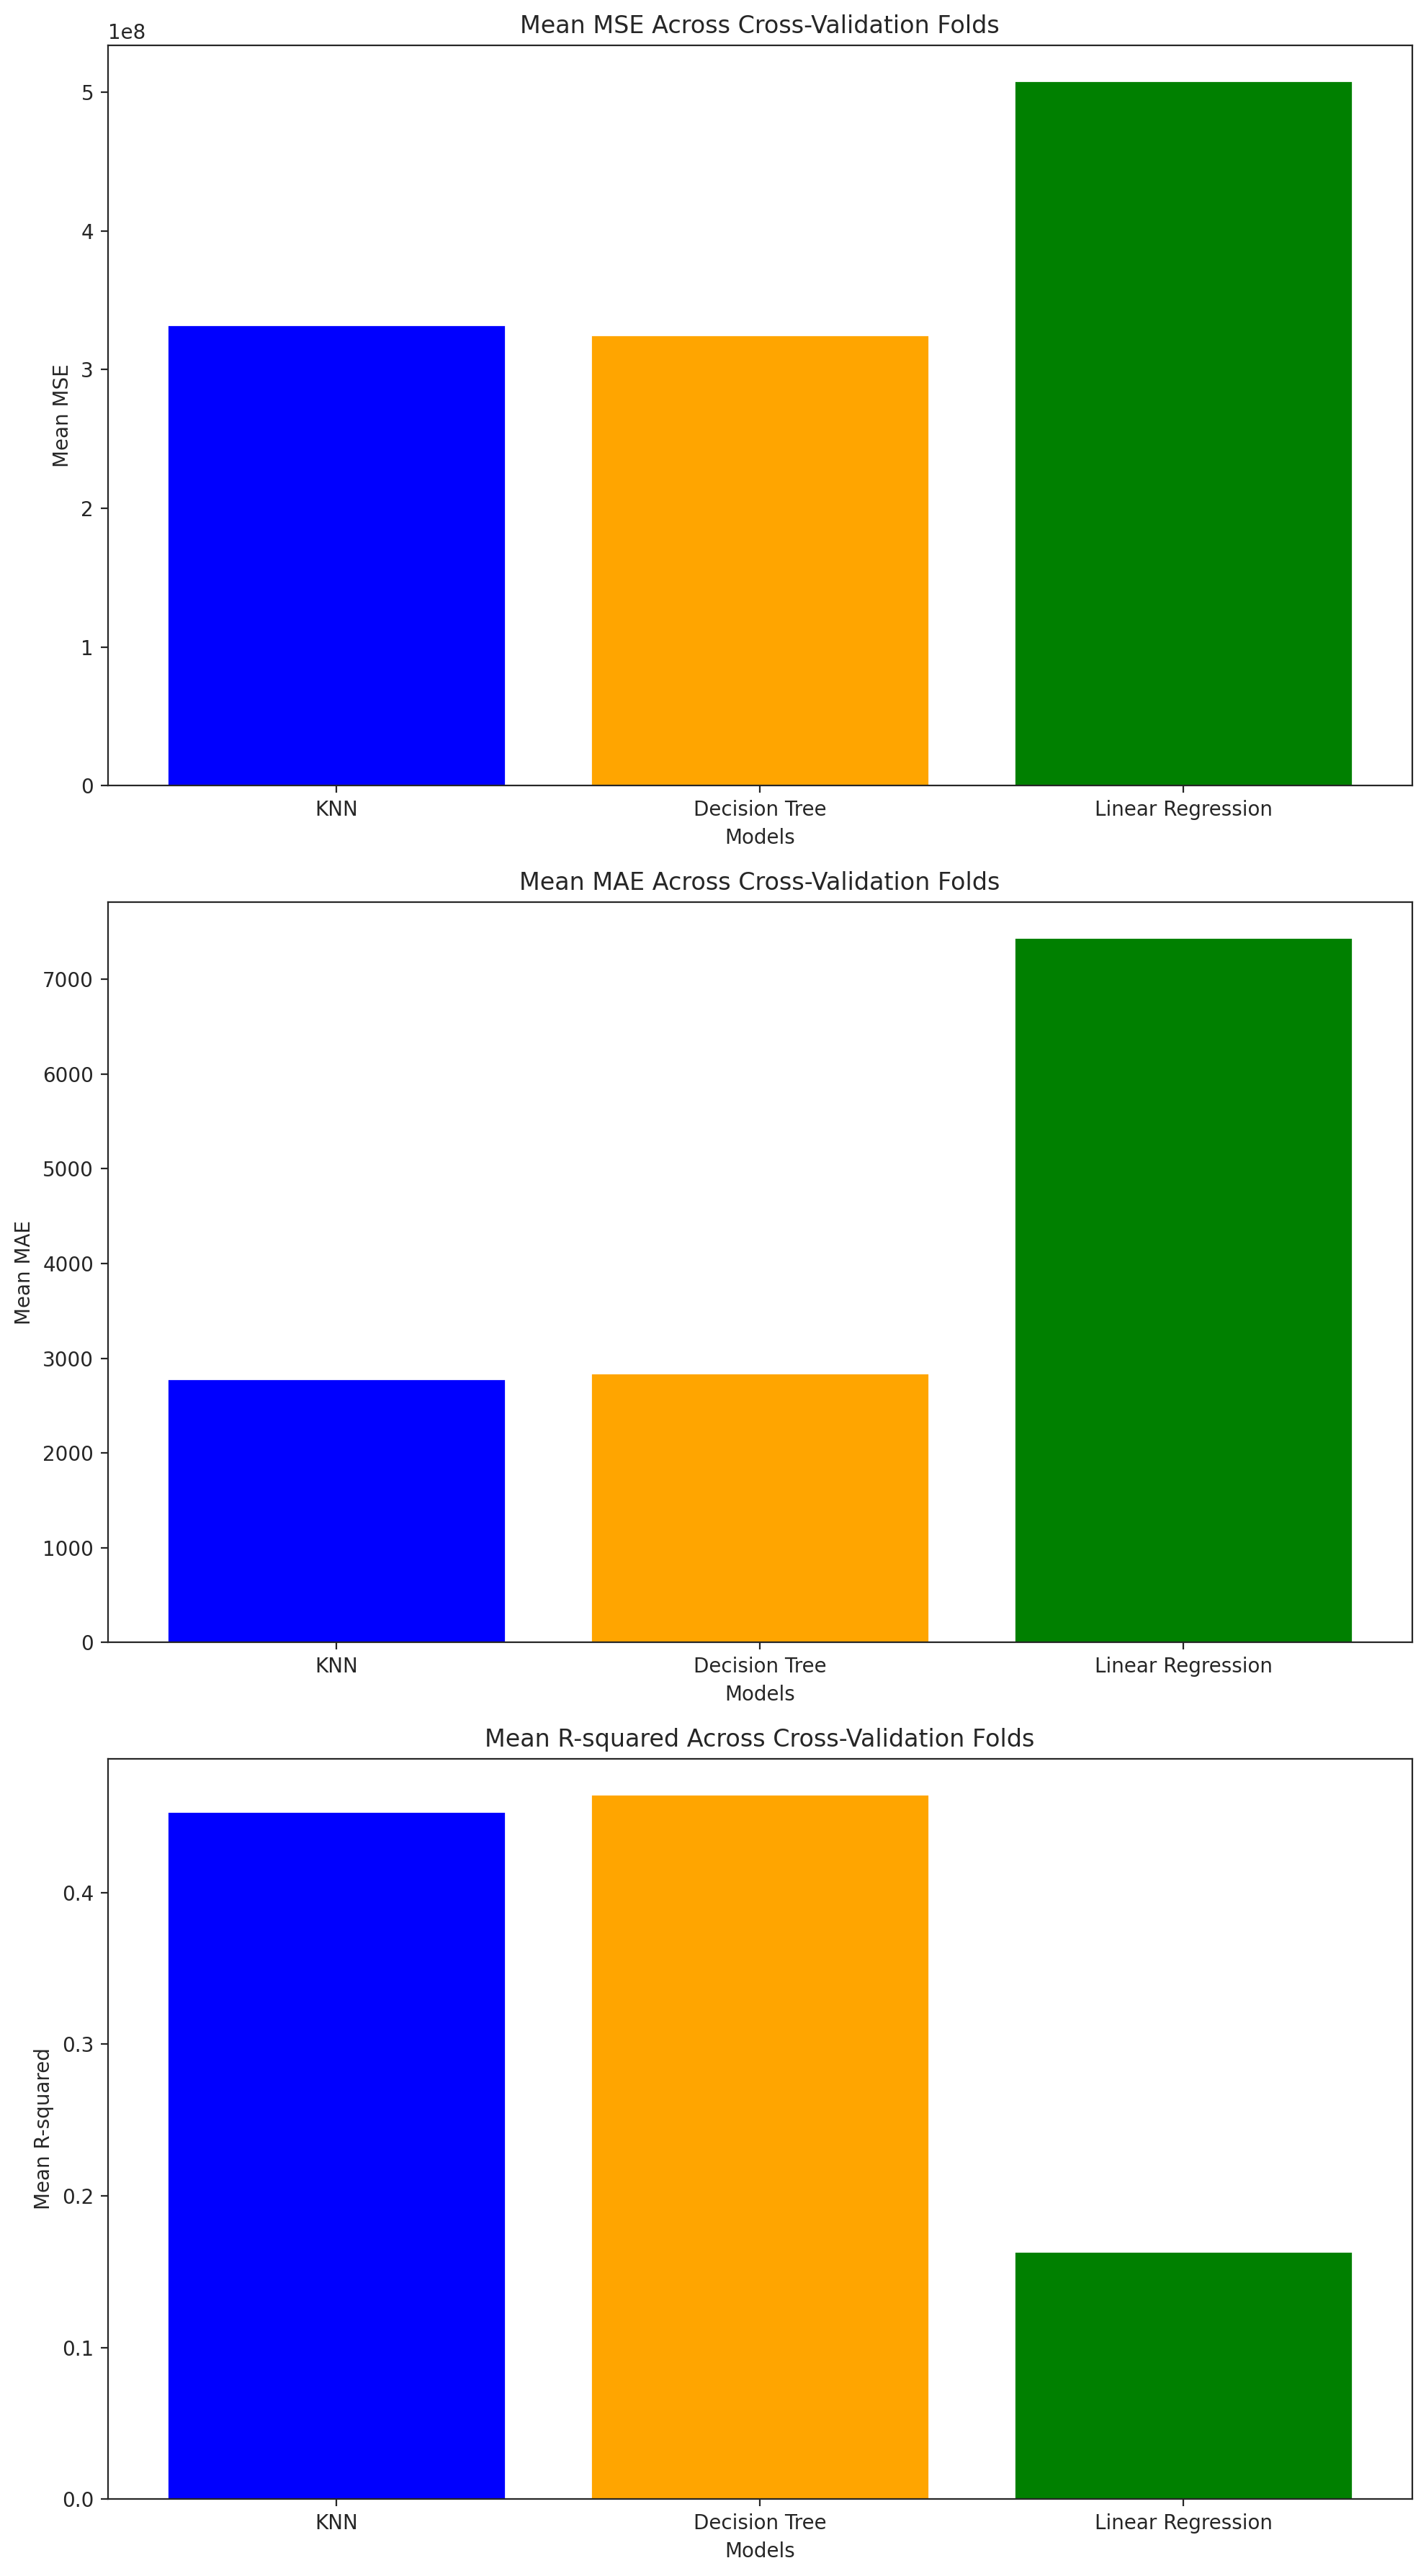

In [158]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
models = ['KNN', 'Decision Tree', 'Linear Regression']
mean_mse = [mse_knn, mse_dt, mse_lr]
mean_r_squared = [r2_knn, r2_dt, r2_lr]
mean_mae = [mae_knn, mae_dt, mae_lr]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 18))

# Plot Mean MSE
ax1.bar(models, mean_mse, color=['blue', 'orange', 'green'])
ax1.set_title('Mean MSE Across Cross-Validation Folds')
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean MSE')

# Plot Mean MAE
ax2.bar(models, mean_mae, color=['blue', 'orange', 'green'])
ax2.set_title('Mean MAE Across Cross-Validation Folds')
ax2.set_xlabel('Models')
ax2.set_ylabel('Mean MAE')

# Plot Mean R-squared
ax3.bar(models, mean_r_squared, color=['blue', 'orange', 'green'])
ax3.set_title('Mean R-squared Across Cross-Validation Folds')
ax3.set_xlabel('Models')
ax3.set_ylabel('Mean R-squared')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [150]:


# Train the models
best_knn_model.fit(X_train, y_train)
best_dt_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = best_knn_model.predict(X_test)
y_pred_dt = best_dt_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# Evaluate performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print or compare the performance metrics
print("KNN Regressor:")
print(f"MSE: {mse_knn}, MAE: {mae_knn}, R-squared: {r2_knn}")

print("\nDecision Tree Regressor:")
print(f"MSE: {mse_dt}, MAE: {mae_dt}, R-squared: {r2_dt}")

print("\nLinear Regressor:")
print(f"MSE: {mse_linear}, MAE: {mae_linear}, R-squared: {r2_linear}")

KNN Regressor:
MSE: 332252484.4239009, MAE: 2780.7035329219507, R-squared: 0.45341508231359273

Decision Tree Regressor:
MSE: 325191532.9576421, MAE: 2843.0435424570487, R-squared: 0.46503097611996924

Linear Regressor:
MSE: 555553652.8828996, MAE: 8116.566690993857, R-squared: 0.08606477944657098


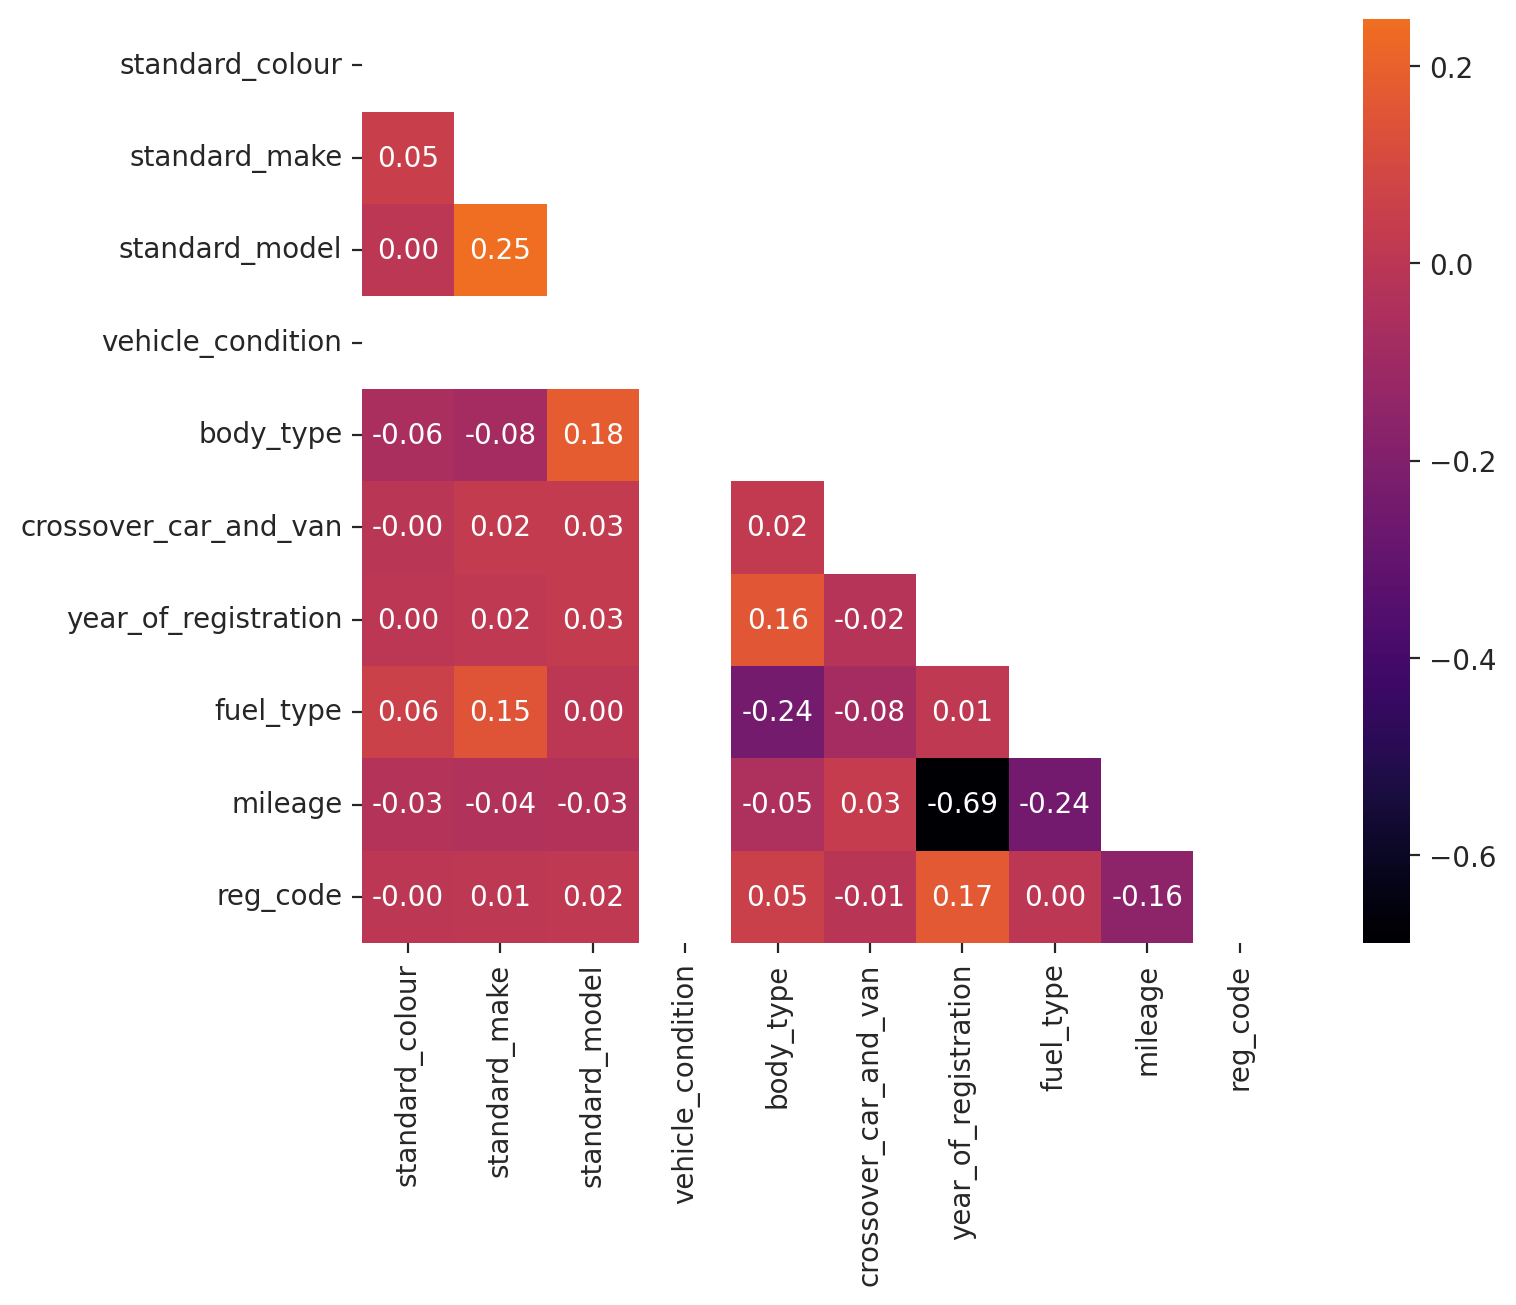

In [ ]:

corr =  X_train.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
cmap = 'inferno'
plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

**Rank Models**

In [154]:
df_performance = pd.DataFrame({
    'Model': ['knn ', 'dtr ', 'lr '],
    'MSE': [mse_knn, mse_dt, mse_linear],
    'MAE':[mae_knn, mae_dt, mae_lr],
    'R-squared': [r2_knn, r2_dt, r2_linear]
})

# Rank models based on MSE
df_performance['Rank_MSE'] = df_performance['MSE'].rank()

# Rank models based on MAE
df_performance['Rank_MAE'] = df_performance['MAE'].rank()

# Rank models based on R-squared
df_performance['Rank_R-squared'] = df_performance['R-squared'].rank(ascending=False)

# Display the performance table
print(df_performance)

  Model           MSE          MAE  R-squared  Rank_MSE  Rank_MAE  \
0  knn   3.322525e+08  2780.703533   0.453415       2.0       1.0   
1  dtr   3.251915e+08  2843.043542   0.465031       1.0       2.0   
2   lr   5.555537e+08  7443.621491   0.086065       3.0       3.0   

   Rank_R-squared  
0             2.0  
1             1.0  
2             3.0  


**Actual vs Prediction**

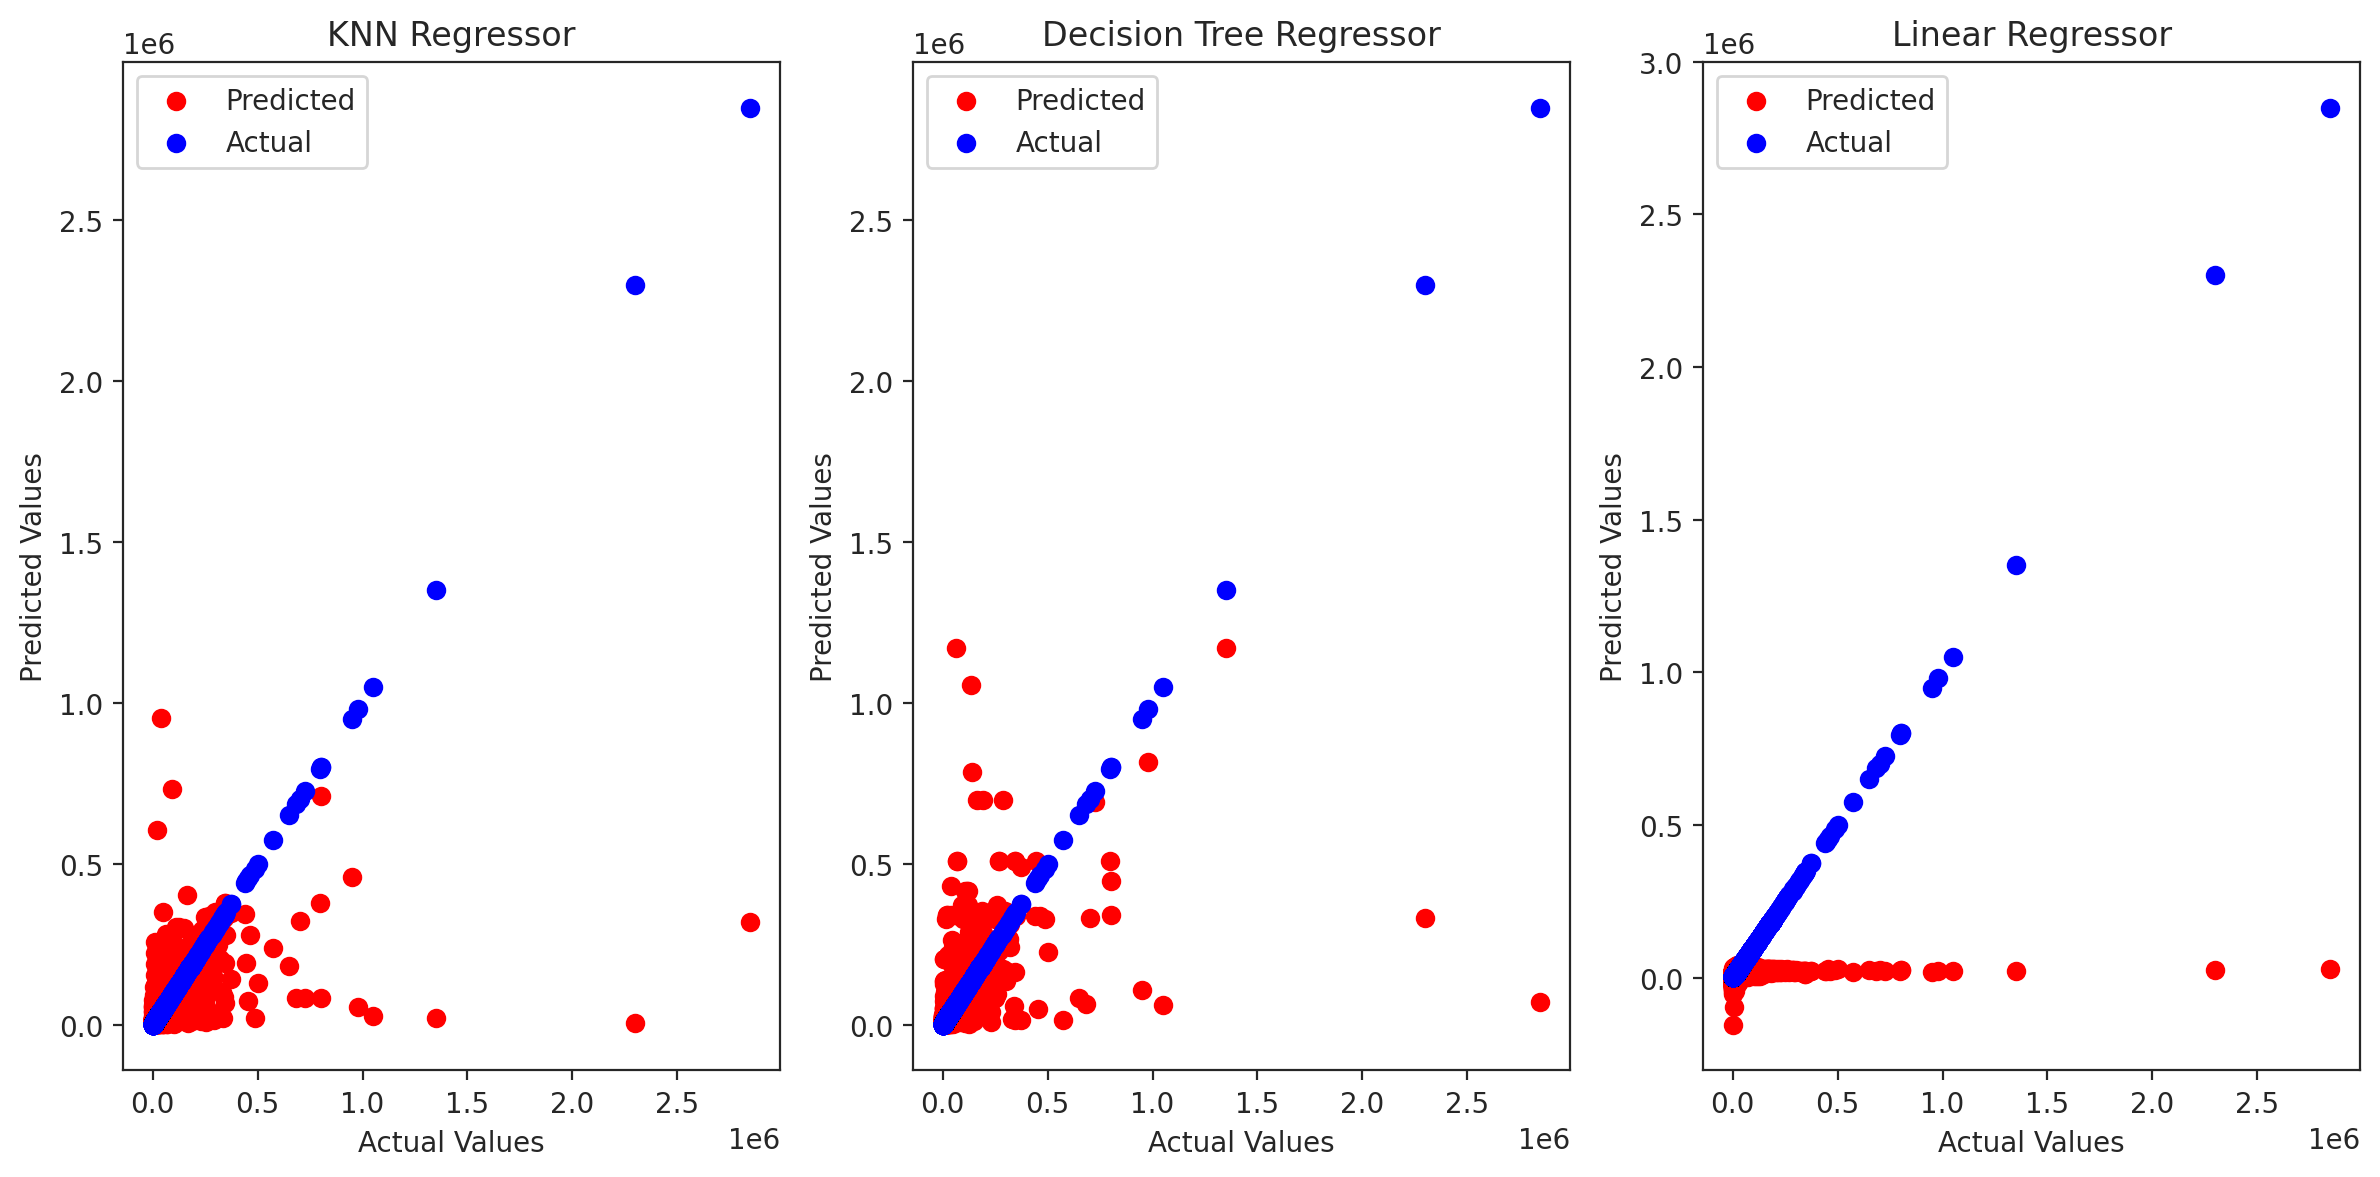

In [159]:
import matplotlib.pyplot as plt

# Scatter plot for KNN Regressor
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_knn, color='red', label='Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.title('KNN Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Scatter plot for Decision Tree Regressor
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, color='red', label='Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.title('Decision Tree Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Scatter plot for Linear Regressor
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_linear, color='red', label='Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.title('Linear Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


**Feature Importance**

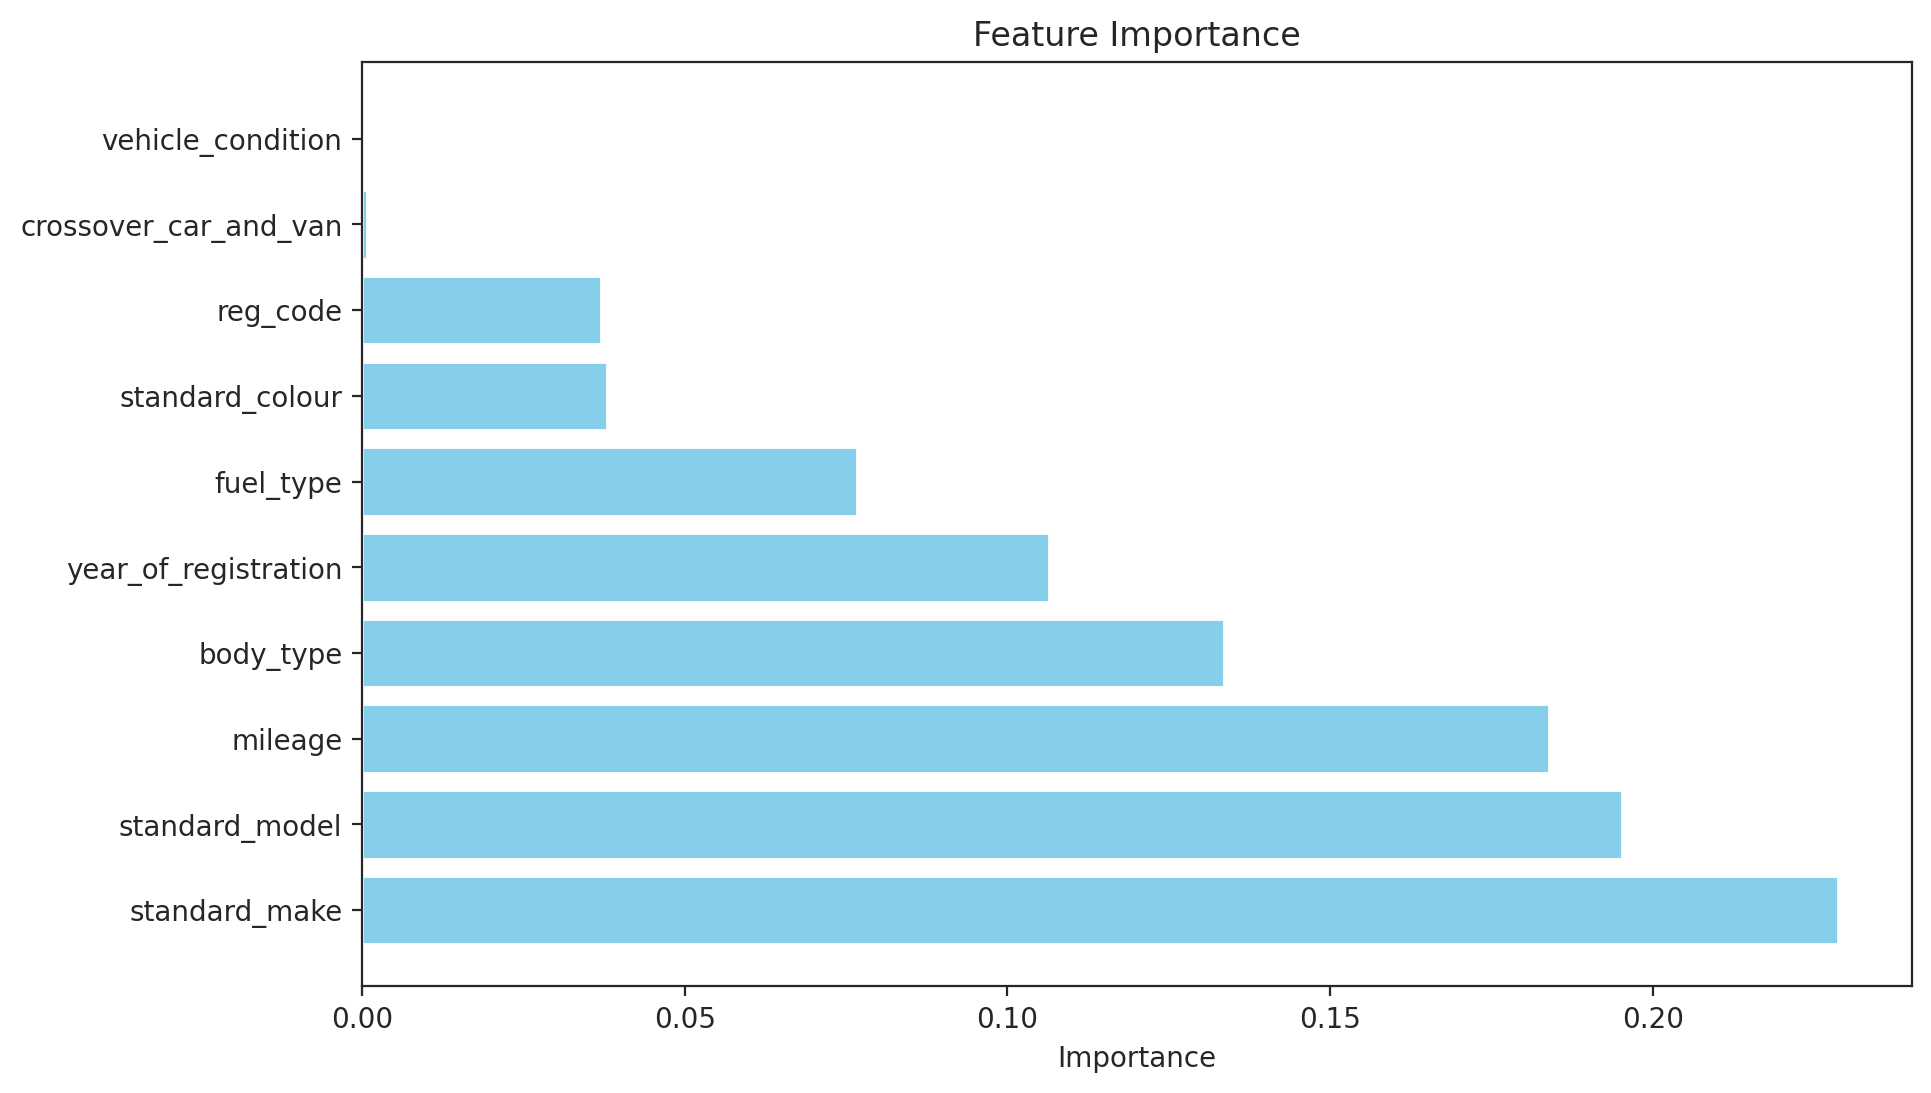

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Train a Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


**Recursive Feature Elimination**

In [183]:
from sklearn.feature_selection import RFE
modelm = LinearRegression()

# Create an RFE selector and fit it to the model
rfe = RFE(modelm, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Get the selected features and their rankings
selected_features = X.columns[rfe.support_]
feature_rankings = rfe.ranking_

# Print the results
print("Selected Features:")
print(selected_features)

print("\nFeature Rankings:")
print(dict(zip(X.columns, feature_rankings)))

Selected Features:
Index(['mileage'], dtype='object')

Feature Rankings:
{'standard_colour': 6, 'standard_make': 3, 'standard_model': 5, 'vehicle_condition': 10, 'body_type': 4, 'crossover_car_and_van': 2, 'year_of_registration': 8, 'fuel_type': 7, 'mileage': 1, 'reg_code': 9}


**Instance Level Errors**

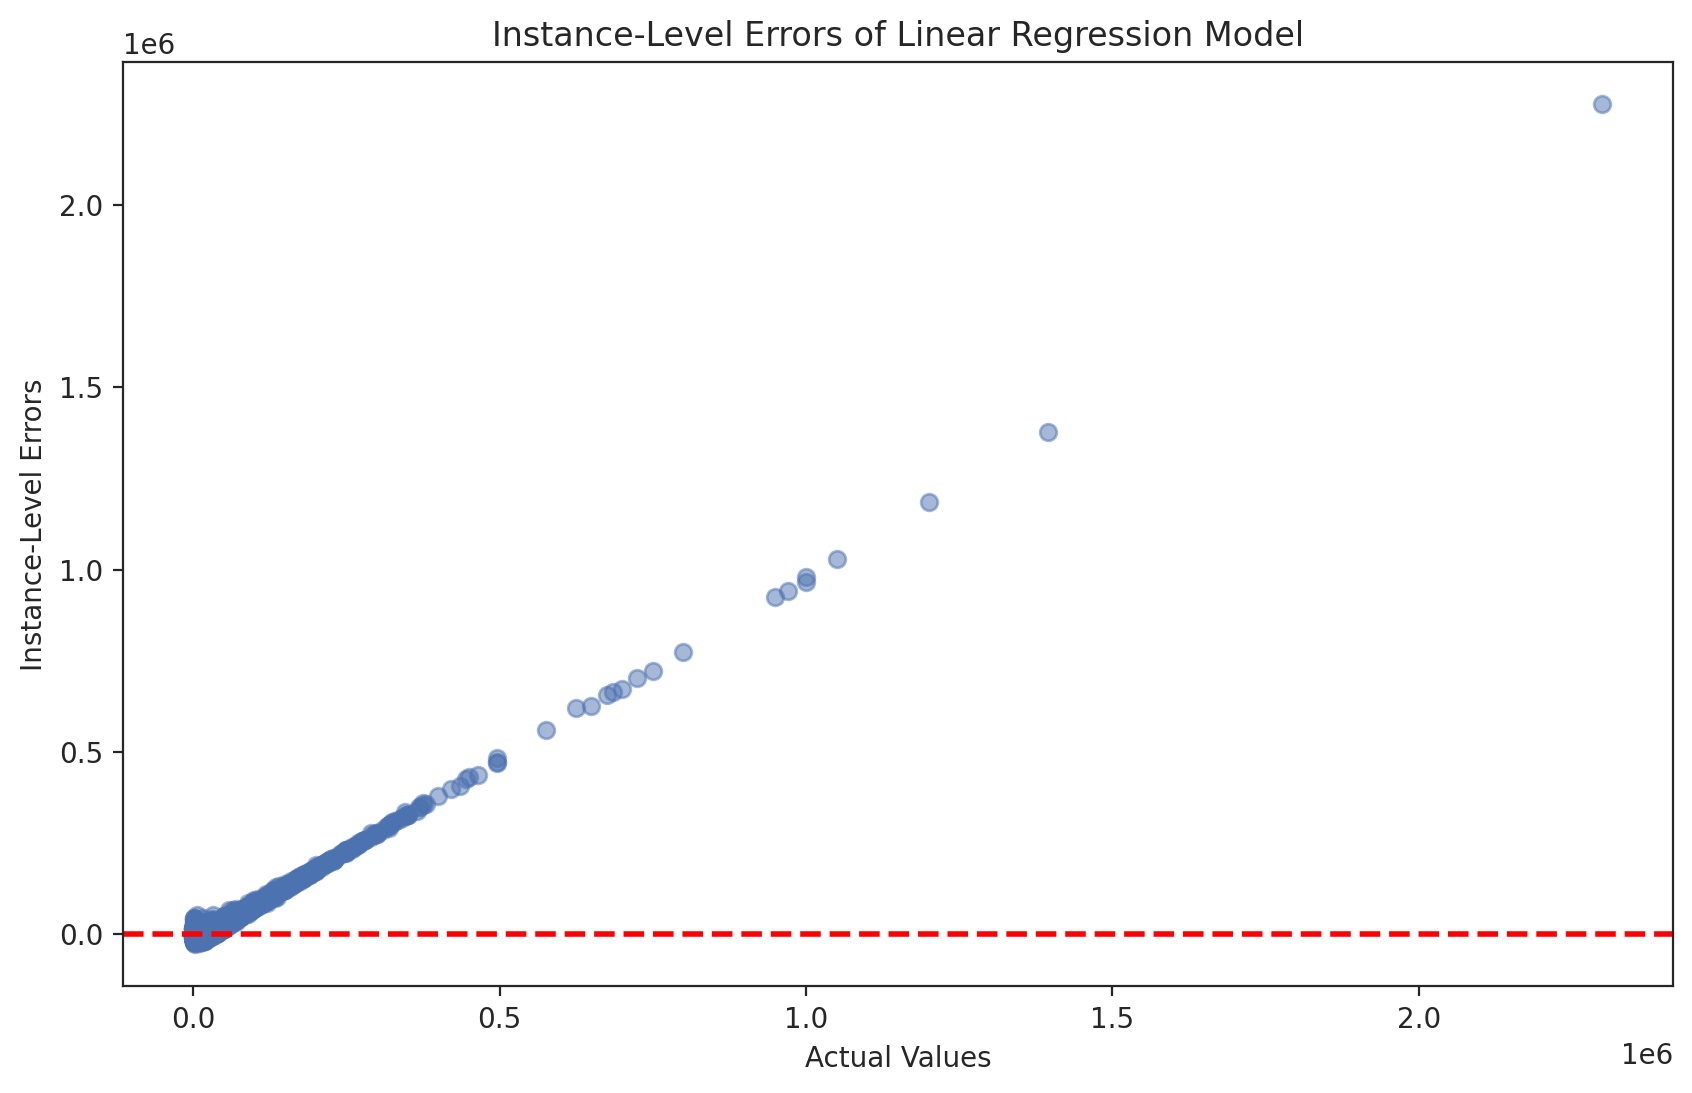

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Create a linear regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear.predict(X_test)

# Calculate instance-level errors
instance_errors = y_test - y_pred

# Visualize instance-level errors with a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, instance_errors, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0 for reference
plt.title('Instance-Level Errors of Linear Regression Model')
plt.xlabel('Actual Values')
plt.ylabel('Instance-Level Errors')
plt.show()
